# Expedia Hotel Recommendations

Written by: Lais Amorim Menezes

Contact Email: laisamorimmenezes@gmail.com

Date Filled: Oct 16, 2023

### Table of Contents:

1. Introduction:
2. Key Questions:
3. Assumptions & Limitations
4. Methods
5. Finding & Analysis

* [Analysis for column `Date_time`](#1)
* [Analysis for column `Site_name`](#2)
* [Analysis for column `Posa_continents`](#3)
* [Analysis for column `User_location_country`](#4)
* [Analysis for column `User_location_region` and `User_location_city`](#5)
* [Analysis for column `Orig_destination_distance`](#6)
* [Analysis for column `User_id`](#7)
* [Analysis for column `Is_mobile`](#8)
* [Analysis for column `Is_package`](#9)
* [Analysis for column `Channel`](#10)
* [Analysis for column `Srch_ci`, `Srch_co` and `number_of_days`](#11)
* [Analysis for column `Srch_adults_cnt`, `Srch_children_cnt` and `Srch_rm_cnt`](#12)
* [Analysis for column `Srch_destination_id` and `Srch_destination_type_id`](#13)
* [Analysis for column `Is_booking`](#14)
* [Analysis for column `Cnt`](#15)
* [Analysis for column `Hotel_continent`, `Hotel_country` and `Hotel_market`](#16)
* [Analysis for column `Hotel_cluster`](#17)
* [Some graphics](#18)


## Introduction:

This business report aims to analyze the customer interactions on Expedia's website. The dataset comprises a selection of records from Expedia's vast collection. Due to the dataset's substantial size, a sample has been taken to facilitate computational efficiency.

The primary objective of this analysis is to predict the hotel cluster that a user is likely to book. Expedia provides a hotel cluster, an in-house algorithm grouping similar hotels based on various factors such as historical pricing, customer ratings, and proximity to city centers. These clusters are invaluable for predicting user preferences when booking hotels. It is important to note that the dataset contains 100 distinct hotel clusters. This predictive goal requires the anticipation of a user's booking outcome (hotel cluster) based on their search and related event attributes. The training data covers the period from 2013 to July 2014, with the test data spanning from August to December 2014

## Key Question:

1. How can we effectively sample and clean the data to prepare it for analysis?
2. What insights can we gather from each column to gain a comprehensive understanding of their significance?
3. How can we draw meaningful conclusions and identify the target variable, along with selecting suitable models for predictive analysis?

## Assumptions & Limitations:

Assumptions:

1. Data Accuracy: It is assumed that the provided data accurately represents a subset of Expedia's extensive dataset.
2. Relevance of Clusters: The assumption is made that hotel clusters are significant identifiers of user booking preferences.

Limitations:

1. Data Encoding: The dataset lacks categorical columns, as all variables are stored numerically. This necessitates the non-standard treatment of numerical columns.
2. Temporal Constraints: The data covers a limited timeframe and does not capture long-term trends or seasonal variations.

## Methods:

The analysis begins with the acquisition of a representative sample from Expedia's customer interaction dataset, accessible on the Kaggle website. The report proceeds by splitting the data into training and test sets based on the interaction's datetime, enabling us to assess prediction accuracy in the future. Data cleaning is undertaken to ensure data quality, followed by a comprehensive exploratory data analysis aimed at unveiling the underlying characteristics and interpretations of each column.

## Finding & Analysis:

Seasonal Interactions: In the year 2013, the months with the highest website interactions were March, July, and October. This pattern continues into 2014, with July being the peak month. Unfortunately, our data only goes up to July 2014. The year 2014 shows an increase in interactions compared to 2013, indicating growing website engagement.

Site Names and Continents: We observed that each site name (e.g., Expedia.com, Expedia.co.uk) corresponds to only one continent. However, multiple site names may link to the same continent. It suggests that certain user locations are more engaged in searches, possibly where Expedia is more popular.

Travel Distances: The median distance between the origin and destination points is approximately 1168.39 miles, which is approximately a 2-hour flight. This gives us an idea of the average travel distances customers are interested in.

Device Usage: Most users access the website from non-mobile devices. Additionally, they often search for hotel options without combining them with flight packages, implying that a significant portion of the users might be primarily interested in hotels.

Booking Preferences: The majority of customers searching the website are likely looking for a one-day hotel stay, typically for two people, likely a couple, booking only one room and traveling without children. They also show a preference for starting their hotel stays on Sundays and tend to conduct searches primarily on weekdays.

Destination Types: In terms of destination types, there are 11 options available. More than half of the destinations are classified as type 1. This suggests a high demand for a particular type of destination.

Booking Behavior: Only 8.71% of the interactions result in actual bookings.

Continents and Countries: Destinations in different continents vary in terms of the number of associated countries. Some continents have multiple countries to explore, while others only have a few like 2.

Target Variable: The target variable for our predictive modeling is the hotel cluster. Within this dataset, the most common hotel cluster is cluster 1, representing 73.04% of the observations.

These findings provide valuable insights into user behavior and preferences on the Expedia website, which will be crucial for any predictive modeling or recommendations for users.

## EDA

In [431]:
# Imports`
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq
import plotly.express as px
from scipy import stats
from scipy.stats import norm
import seaborn as sns

In [140]:
#Loding the data
hotel_data = pd.read_csv('/Users/laisamorim/Desktop/Brain Station Course/Capstone/Notebooks/Data/train.csv')

As the data is very big I got a sample of 4670293 and put the random_state so I can replicate if I need.

In [5]:
hotel_df = hotel_data.sample(n = 4670293, random_state = 42)

In [6]:
# Save the sampled data to a CSV file
hotel_df.to_csv('hotel_df.csv', index=False)

In [142]:
#Loding the data
hotel_df = pd.read_csv('/Users/laisamorim/Desktop/Brain Station Course/Capstone/Notebooks/Data/hotel_df.csv')

In [143]:
hotel_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-11-02 12:39:22,2,3,66,220,54870,636.4815,1079676,1,0,...,0,1,5405,6,0,1,4,8,126,66
1,2014-08-20 19:13:46,2,3,117,373,16218,NaN,145975,0,0,...,3,2,11917,1,0,1,0,140,59,92
2,2014-10-13 12:40:44,23,1,1,457,6693,656.0343,1067677,0,0,...,0,1,8253,1,0,1,6,70,19,51
3,2014-04-10 18:17:35,2,3,66,258,4687,5581.4867,179461,1,0,...,0,1,792,1,0,1,6,208,1480,67
4,2014-10-23 12:56:53,2,3,66,348,43040,NaN,971368,0,0,...,0,1,12014,1,0,2,2,50,644,68


In [513]:
hotel_df.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'number_of_days'],
      dtype='object')

In [146]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4670293 entries, 0 to 4670292
Data columns (total 24 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   date_time                  object 
 1   site_name                  int64  
 2   posa_continent             int64  
 3   user_location_country      int64  
 4   user_location_region       int64  
 5   user_location_city         int64  
 6   orig_destination_distance  float64
 7   user_id                    int64  
 8   is_mobile                  int64  
 9   is_package                 int64  
 10  channel                    int64  
 11  srch_ci                    object 
 12  srch_co                    object 
 13  srch_adults_cnt            int64  
 14  srch_children_cnt          int64  
 15  srch_rm_cnt                int64  
 16  srch_destination_id        int64  
 17  srch_destination_type_id   int64  
 18  is_booking                 int64  
 19  cnt                        int64  
 20  ho

In [147]:
hotel_df['date_time'] = pd.to_datetime(hotel_df['date_time'])

In [148]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4670293 entries, 0 to 4670292
Data columns (total 24 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   date_time                  datetime64[ns]
 1   site_name                  int64         
 2   posa_continent             int64         
 3   user_location_country      int64         
 4   user_location_region       int64         
 5   user_location_city         int64         
 6   orig_destination_distance  float64       
 7   user_id                    int64         
 8   is_mobile                  int64         
 9   is_package                 int64         
 10  channel                    int64         
 11  srch_ci                    object        
 12  srch_co                    object        
 13  srch_adults_cnt            int64         
 14  srch_children_cnt          int64         
 15  srch_rm_cnt                int64         
 16  srch_destination_id        int64    

As the column 'date_time' is an object I change it to a datetime, so I will split the data into train and in test the train data will be for year 2013 and July of 2014 and the test data will be from August to end of the year of 2014

In [151]:
hotel_df = hotel_df[((hotel_df['date_time'].dt.year == 2013) | ((hotel_df['date_time'].dt.year == 2014) & (hotel_df['date_time'].dt.month < 8)))]
test = hotel_df[((hotel_df['date_time'].dt.year == 2014) & (hotel_df['date_time'].dt.month >= 8))]

In [152]:
hotel_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
3,2014-04-10 18:17:35,2,3,66,258,4687,5581.4867,179461,1,0,...,0,1,792,1,0,1,6,208,1480,67
5,2013-03-25 18:30:34,2,3,66,363,31283,NaN,172916,0,0,...,1,1,8253,1,0,2,6,70,19,11
8,2014-07-15 13:46:54,2,3,66,184,2037,611.8046,488305,0,1,...,4,1,8250,1,0,1,2,50,628,45
10,2014-05-28 09:23:19,2,3,152,545,51071,NaN,969295,0,0,...,0,2,20968,6,1,1,6,144,1324,59
11,2013-03-23 20:00:06,11,3,66,442,55448,189.4126,1124094,1,0,...,1,1,26862,6,0,4,2,50,745,5


In [153]:
print(f'There are {hotel_df.shape[0]} columns and {hotel_df.shape[1]} rows')

There are 2963463 columns and 24 rows


In [154]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2963463 entries, 3 to 4670292
Data columns (total 24 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   date_time                  datetime64[ns]
 1   site_name                  int64         
 2   posa_continent             int64         
 3   user_location_country      int64         
 4   user_location_region       int64         
 5   user_location_city         int64         
 6   orig_destination_distance  float64       
 7   user_id                    int64         
 8   is_mobile                  int64         
 9   is_package                 int64         
 10  channel                    int64         
 11  srch_ci                    object        
 12  srch_co                    object        
 13  srch_adults_cnt            int64         
 14  srch_children_cnt          int64         
 15  srch_rm_cnt                int64         
 16  srch_destination_id        int64         

In [155]:
hotel_df.duplicated().sum()

11

In [156]:
duplicate_rows = hotel_df[hotel_df.duplicated(keep=False)]

# Sort in descending order
duplicate_rows = duplicate_rows.sort_values(by='date_time', ascending=False)

duplicate_rows

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
1423320,2014-07-26 14:10:58,22,2,0,203,54226,NaN,1651,0,0,...,0,3,48908,4,0,1,3,182,46,36
4217883,2014-07-26 14:10:58,22,2,0,203,54226,NaN,1651,0,0,...,0,3,48908,4,0,1,3,182,46,36
3436856,2014-07-13 02:41:56,24,2,3,45,21685,NaN,9763,0,0,...,0,1,8797,1,0,1,6,144,1450,82
1908332,2014-07-13 02:41:56,24,2,3,45,21685,NaN,9763,0,0,...,0,1,8797,1,0,1,6,144,1450,82
4605004,2014-06-27 12:55:44,2,3,154,892,41193,NaN,133858,0,0,...,0,1,375,1,0,1,4,119,2063,82
1907438,2014-06-27 12:55:44,2,3,154,892,41193,NaN,133858,0,0,...,0,1,375,1,0,1,4,119,2063,82
1915749,2014-06-27 09:00:45,2,3,66,337,51661,NaN,808005,0,0,...,0,1,7635,3,0,1,2,50,675,69
1204825,2014-06-27 09:00:45,2,3,66,337,51661,NaN,808005,0,0,...,0,1,7635,3,0,1,2,50,675,69
379461,2014-05-05 18:41:53,24,2,0,435,2976,NaN,1187184,0,0,...,2,1,21222,1,0,2,3,152,73,27
3040579,2014-05-05 18:41:53,24,2,0,435,2976,NaN,1187184,0,0,...,2,1,21222,1,0,2,3,152,73,27


In [157]:
duplicate_percentage = (hotel_df.duplicated().sum() / len(hotel_df)) * 100
duplicate_percentage

0.000371187357493581

In [158]:
hotel_df = hotel_df.drop_duplicates()

In [159]:
hotel_df.duplicated().sum()

0

Upon closer inspection of the data, I identified 11 duplicate columns. After further examination and considering the percentage of duplication, I have decided to remove these columns from the dataset.

In [161]:
hotel_df.isna().sum()

date_time                          0
site_name                          0
posa_continent                     0
user_location_country              0
user_location_region               0
user_location_city                 0
orig_destination_distance    1039647
user_id                            0
is_mobile                          0
is_package                         0
channel                            0
srch_ci                         5256
srch_co                         5256
srch_adults_cnt                    0
srch_children_cnt                  0
srch_rm_cnt                        0
srch_destination_id                0
srch_destination_type_id           0
is_booking                         0
cnt                                0
hotel_continent                    0
hotel_country                      0
hotel_market                       0
hotel_cluster                      0
dtype: int64

In [162]:
hotel_df[hotel_df['orig_destination_distance'].isna()]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
5,2013-03-25 18:30:34,2,3,66,363,31283,NaN,172916,0,0,...,1,1,8253,1,0,2,6,70,19,11
10,2014-05-28 09:23:19,2,3,152,545,51071,NaN,969295,0,0,...,0,2,20968,6,1,1,6,144,1324,59
15,2014-06-17 21:59:44,24,2,3,50,50576,NaN,215012,0,0,...,0,1,669,3,0,2,2,50,212,84
20,2014-04-20 03:21:33,37,1,69,750,1393,NaN,18030,1,1,...,0,1,8739,1,0,1,6,144,4,29
28,2014-05-01 19:50:03,2,3,66,337,18732,NaN,294121,0,1,...,0,1,8791,1,0,2,4,8,110,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4670268,2013-01-22 18:38:06,30,4,195,597,51774,NaN,1038876,0,0,...,0,1,7635,3,0,1,2,50,675,55
4670275,2013-04-17 23:22:12,15,1,55,13,3025,NaN,1152372,0,0,...,0,1,24174,6,1,1,6,170,1894,62
4670281,2013-05-21 11:32:59,37,1,69,930,13984,NaN,79659,0,0,...,1,1,20994,1,0,2,6,46,1089,11
4670289,2014-07-11 16:45:24,2,3,179,11,51280,NaN,1191613,0,1,...,0,1,547,1,0,2,4,25,176,62


In [163]:
percentage_nan = (hotel_df['orig_destination_distance'].isna().sum() / len(hotel_df)) * 100
percentage_nan

35.08229591705889

In [164]:
hotel_df.dropna(subset=['orig_destination_distance'], inplace=True)

In [165]:
hotel_df['orig_destination_distance'].isna().sum()

0

I decided to remove the `orig_destination_distance` column due to the presence of a significant number of NaN values, exceeding 20%.

In [166]:
percentage_nan = (hotel_df['srch_ci'].isna().sum() / len(hotel_df)) * 100
percentage_nan

0.1597875044508149

In [167]:
hotel_df.dropna(subset=['srch_ci'], inplace=True)

In [168]:
hotel_df['srch_ci'].isna().sum()

0

In [169]:
hotel_df['srch_co'].isna().sum()

0

##### I decided to drop the NaN values in the `srch_ci` column, as they accounted for just 0.159% of the data. Upon further investigation, I found that the same rows with NaN values in `srch_ci` also had NaN values in `srch_co`. Consequently, I have successfully eliminated NaN values in both columns.

In [170]:
hotel_df.isna().sum()

date_time                    0
site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_ci                      0
srch_co                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
is_booking                   0
cnt                          0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_cluster                0
dtype: int64

In [171]:
# Have a new name for the clean data
hotel_clean = hotel_df

In [172]:
# Checking the data
hotel_clean.head(5)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
3,2014-04-10 18:17:35,2,3,66,258,4687,5581.4867,179461,1,0,...,0,1,792,1,0,1,6,208,1480,67
8,2014-07-15 13:46:54,2,3,66,184,2037,611.8046,488305,0,1,...,4,1,8250,1,0,1,2,50,628,45
11,2013-03-23 20:00:06,11,3,66,442,55448,189.4126,1124094,1,0,...,1,1,26862,6,0,4,2,50,745,5
13,2013-08-10 18:33:14,2,3,66,467,10851,1331.8438,109659,1,0,...,0,1,12206,6,0,1,2,50,628,79
14,2014-01-16 08:31:44,2,3,66,174,55922,95.0004,647367,0,0,...,0,1,24282,6,0,3,2,50,355,48


#### Making an analysis in column `Date_time` <a class= 'anchor' id = '1'></a> 

In [173]:
hotel_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1920731 entries, 3 to 4670290
Data columns (total 24 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   date_time                  datetime64[ns]
 1   site_name                  int64         
 2   posa_continent             int64         
 3   user_location_country      int64         
 4   user_location_region       int64         
 5   user_location_city         int64         
 6   orig_destination_distance  float64       
 7   user_id                    int64         
 8   is_mobile                  int64         
 9   is_package                 int64         
 10  channel                    int64         
 11  srch_ci                    object        
 12  srch_co                    object        
 13  srch_adults_cnt            int64         
 14  srch_children_cnt          int64         
 15  srch_rm_cnt                int64         
 16  srch_destination_id        int64         

I already verified that the `Date_time` column was initially in object format, and to facilitate data manipulation within this column, I converted it to a datetime format.

In [174]:
hotel_clean

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
3,2014-04-10 18:17:35,2,3,66,258,4687,5581.4867,179461,1,0,...,0,1,792,1,0,1,6,208,1480,67
8,2014-07-15 13:46:54,2,3,66,184,2037,611.8046,488305,0,1,...,4,1,8250,1,0,1,2,50,628,45
11,2013-03-23 20:00:06,11,3,66,442,55448,189.4126,1124094,1,0,...,1,1,26862,6,0,4,2,50,745,5
13,2013-08-10 18:33:14,2,3,66,467,10851,1331.8438,109659,1,0,...,0,1,12206,6,0,1,2,50,628,79
14,2014-01-16 08:31:44,2,3,66,174,55922,95.0004,647367,0,0,...,0,1,24282,6,0,3,2,50,355,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4670284,2013-09-25 10:06:36,11,3,205,385,46963,332.1485,1053761,0,1,...,0,1,8267,1,0,2,2,50,675,83
4670285,2014-05-20 22:16:22,2,3,66,174,23702,327.0897,165598,0,0,...,0,1,9145,1,0,2,2,50,364,50
4670287,2013-10-20 22:43:37,2,3,205,155,13951,258.9476,612454,0,0,...,2,1,5794,3,0,2,2,50,660,94
4670288,2014-06-27 14:40:48,2,3,66,447,42413,38.8160,1049415,1,0,...,0,1,11625,1,0,1,2,50,658,71


In [175]:
hotel_clean['date_time'].dt.year.unique()

array([2014, 2013], dtype=int32)

In [177]:
hotel_clean['date_time'].dt.month.unique()

array([ 4,  7,  3,  8,  1,  5,  6,  2, 10,  9, 11, 12], dtype=int32)

In [186]:
# Just checking if we don't have the data from year 2014 after Agust
hotel_clean[(hotel_clean['date_time'].dt.year == 2014) & (hotel_clean['date_time'].dt.month >= 8)]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster


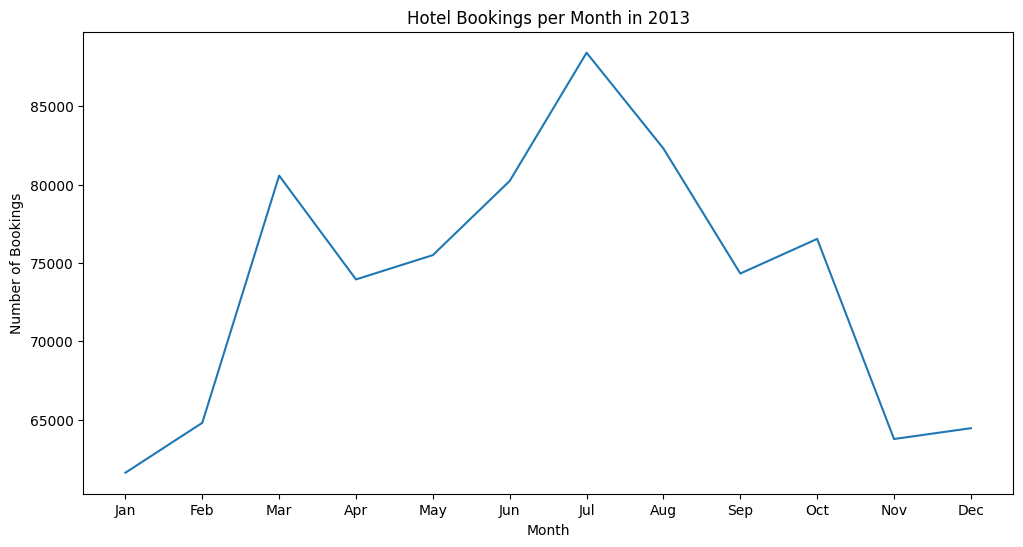

In [187]:
# Filter the data for the year 2013
data_2013 = hotel_clean[hotel_clean['date_time'].dt.year == 2013]

# Plot the number of hotel bookings per month in 2013
plt.figure(figsize=(12, 6))
data_2013['date_time'].dt.month.value_counts().sort_index().plot()
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Hotel Bookings per Month in 2013')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

The data reveals distinct patterns in website traffic throughout the year 2013. At the beginning and end of the year, there were notably lower levels of activity. However, during the summer vacation month of July, as well as in March and October, there were significant peaks in website traffic.

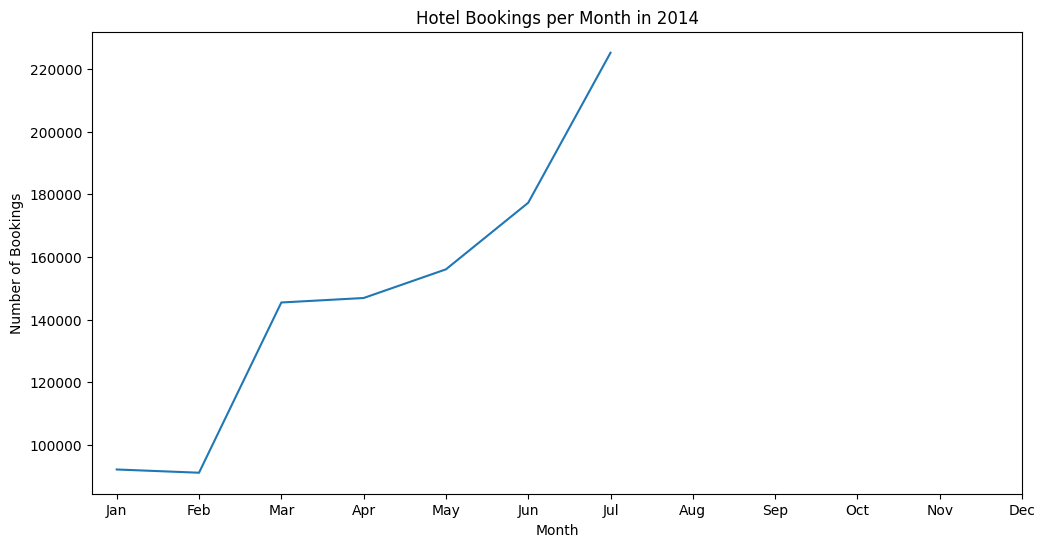

In [188]:
# Filter the data for the year 2014
data_2014 = hotel_clean[hotel_clean['date_time'].dt.year == 2014]

# Plot the number of hotel bookings per month in 2014
plt.figure(figsize=(12, 6))
data_2014['date_time'].dt.month.value_counts().sort_index().plot()
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Hotel Bookings per Month in 2014')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

On the contrary, 2014 marked a significant increase in website traffic. July stood out as the busiest month, being the latest month for which we have data. Conversely, the year began with relatively lower activity in January and February. Notably, we still observed distinct spikes in traffic during March and July, reminiscent of the patterns seen in 2013.

#### Making an analysis in column `site_name` <a class= 'anchor' id = '2'></a> 

In [189]:
website_count = hotel_df['site_name'].value_counts()
total_count = len(hotel_df)

percentages = (website_count / total_count) * 100
percentages

site_name
2     75.140871
11     8.941856
34     7.439824
8      2.620148
23     2.392110
13     1.736630
26     0.333571
37     0.331540
24     0.281299
10     0.269585
40     0.186127
22     0.109229
19     0.048471
17     0.039464
25     0.023012
28     0.017337
30     0.014265
18     0.010777
33     0.009892
15     0.008695
29     0.006820
21     0.005831
35     0.005727
32     0.004790
20     0.004373
27     0.002863
14     0.002863
7      0.002603
36     0.002083
41     0.001770
53     0.001406
9      0.001354
6      0.001093
31     0.000833
48     0.000312
16     0.000260
38     0.000104
46     0.000104
45     0.000104
Name: count, dtype: float64

In [190]:
hotel_clean['site_name'].nunique()

39

In [191]:
percentage_less_than_1 = percentages <= 1
percentage_less_than_1.value_counts()

count
True     33
False     6
Name: count, dtype: int64

A total of 75.14% of customers are visiting website 2, while the remaining 33 out of 39 websites (e.g., Expedia.com, Expedia.co.uk, Expedia.co.jp) each receive less than 1% of customer interactions.

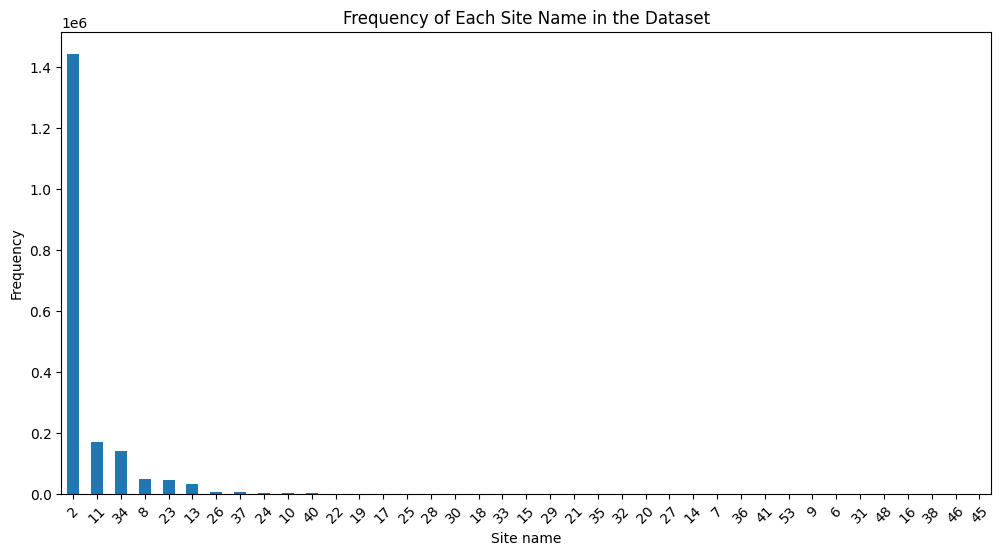

In [192]:
site_counts = hotel_clean['site_name'].value_counts()

# Sort the site by frequency in descending order
site_counts = site_counts.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
site_counts.plot(kind='bar')
plt.xlabel('Site name')
plt.ylabel('Frequency')
plt.title('Frequency of Each Site Name in the Dataset')
plt.xticks(rotation=45) 

# Show the plot
plt.show()

#### Making an analysis in cloumn `posa_continent` <a class= 'anchor' id = '3'></a> 

In [193]:
hotel_clean['posa_continent'].unique()

array([3, 1, 4, 0, 2])

In [194]:
iltered_data = hotel_clean[hotel_clean[ç.unique())

[3]


In [503]:
filtered_data = hotel_clean[hotel_clean['site_name'] == 40]

# Print the filtered data
print(filtered_data['posa_continent'].unique())

[3]


In [196]:
filtered_data = hotel_clean[hotel_clean['posa_continent'] == 3]

# Print the filtered data
print(filtered_data['site_name'].unique())

[ 2 11 34 40 19 41]


In [197]:
filtered_data = hotel_clean[hotel_clean['posa_continent'] == 1]

# Print the filtered data
print(filtered_data['site_name'].unique())

[13 37 23  7 21 17 28 29 15 16 32 53 14  9]


In [198]:
filtered_data = hotel_clean[hotel_clean['posa_continent'] == 4]

# Print the filtered data
print(filtered_data['site_name'].unique())

[ 8 30]


In [199]:
filtered_data = hotel_clean[hotel_clean['posa_continent'] == 0]

# Print the filtered data
print(filtered_data['site_name'].unique())

[26 10  6]


In [200]:
filtered_data = hotel_clean[hotel_clean['posa_continent'] == 2]

# Print the filtered data
print(filtered_data['site_name'].unique())

[24 22 27 25 35 36 33 20 18 31 38 46 48 45]


It's evident that there are five continents associated with the site names, which are labeled as 3, 1, 4, 0, and 2. Each of these continents corresponds to a set of site names through which users can access the Expedia website. However, it's worth noting that each website is exclusive to a single continent.

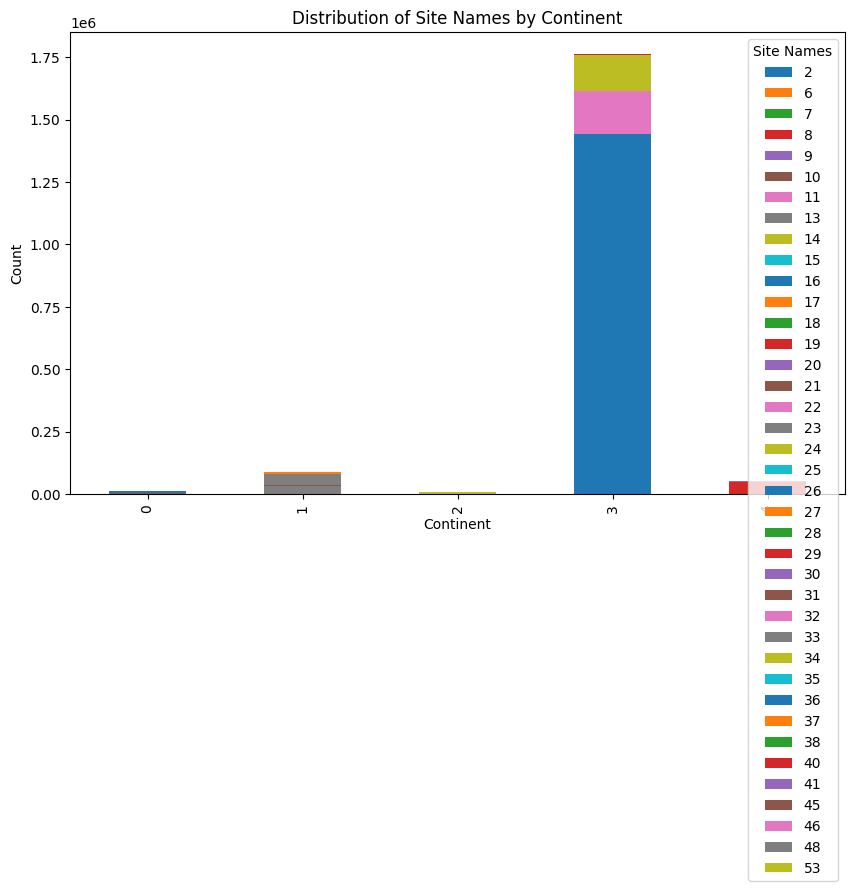

In [201]:
# Group the data by 'posa_continent' and 'site_name' and count the occurrences
grouped_data = hotel_clean.groupby(['posa_continent', 'site_name']).size().unstack(fill_value=0)

# Create a stacked bar plot
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot with labels and titles
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Distribution of Site Names by Continent')

# Show the plot
plt.legend(title='Site Names', loc='upper right')
plt.show()

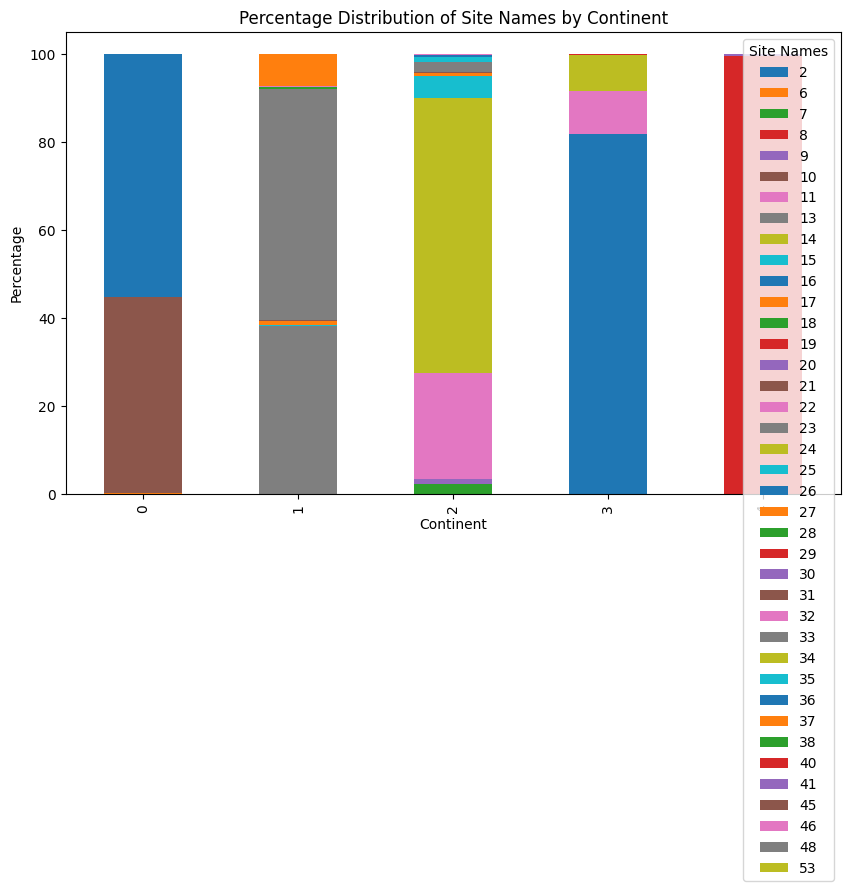

In [202]:
# Group the data by 'posa_continent' and 'site_name' and count the occurrences
grouped_data = hotel_clean.groupby(['posa_continent', 'site_name']).size().unstack(fill_value=0)

# Calculate the total count for each 'posa_continent'
total_counts = grouped_data.sum(axis=1)

# Calculate the percentage for each 'site_name'
percentage_data = grouped_data.divide(total_counts, axis=0) * 100

# Create a stacked bar plot with percentages
percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot with labels and titles
plt.xlabel('Continent')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Site Names by Continent')

# Show the plot
plt.legend(title='Site Names', loc='upper right')
plt.show()

In [203]:
# getting the percentage 
df_filtered = percentage_data[percentage_data > 0]
df_filtered.head(5)

site_name,2,6,7,8,9,10,11,13,14,15,...,35,36,37,38,40,41,45,46,48,53
posa_continent,,,,,,,,,,,,,,,,,,,,,
0,NaN,0.180941,NaN,NaN,NaN,44.614854,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.057191,NaN,0.029739,NaN,NaN,38.15341,0.06291,0.191019,...,NaN,NaN,7.283874,NaN,NaN,NaN,NaN,NaN,NaN,0.030883
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.270648,0.462054,NaN,0.023103,NaN,NaN,0.023103,0.023103,0.069308,NaN
3,81.889447,NaN,NaN,NaN,NaN,NaN,9.744945,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.202844,0.001929,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,99.458498,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This graphic provides valuable insights into the percentage distribution of each website among different continents.

#### Making an analysis in column `user_location_country` <a class= 'anchor' id = '4'></a> 

In [204]:
hotel_clean['user_location_country'].nunique()

21

In [205]:
hotel_clean['user_location_country'].unique()

array([ 66, 205,  46,  77, 215,   1,  63, 182,  69,   0,  85,  43,  16,
        55, 202, 141, 209,  35,  31, 206, 130])

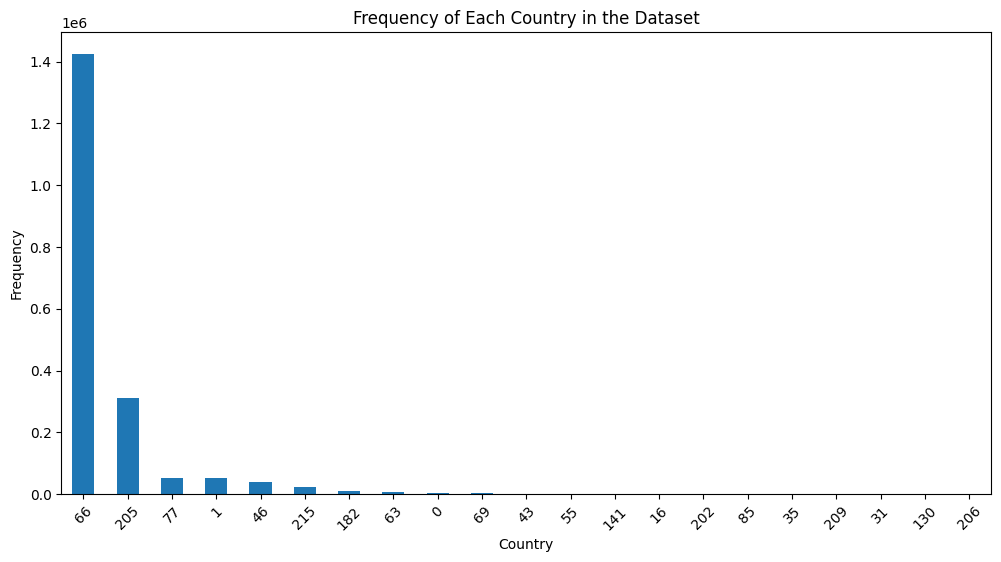

In [206]:
# Counting the countries
country_counts = hotel_clean['user_location_country'].value_counts()

# Sort the countries by frequency in descending order
country_counts = country_counts.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Frequency of Each Country in the Dataset')
plt.xticks(rotation=45) 

# Show the plot
plt.show()

In this grafic we can see that we have 21 countrys and the country 66 is the one that more customer engagement.

In [224]:
hotel_clean.head(10)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
3,2014-04-10 18:17:35,2,3,66,258,4687,5581.4867,179461,1,0,...,0,1,792,1,0,1,6,208,1480,67
8,2014-07-15 13:46:54,2,3,66,184,2037,611.8046,488305,0,1,...,4,1,8250,1,0,1,2,50,628,45
11,2013-03-23 20:00:06,11,3,66,442,55448,189.4126,1124094,1,0,...,1,1,26862,6,0,4,2,50,745,5
13,2013-08-10 18:33:14,2,3,66,467,10851,1331.8438,109659,1,0,...,0,1,12206,6,0,1,2,50,628,79
14,2014-01-16 08:31:44,2,3,66,174,55922,95.0004,647367,0,0,...,0,1,24282,6,0,3,2,50,355,48
17,2014-05-26 09:38:07,2,3,66,442,16876,802.8949,468780,0,0,...,0,2,8250,1,0,1,2,50,628,47
19,2014-06-05 17:11:08,2,3,66,220,2086,4693.4969,914800,0,0,...,0,1,8788,1,1,1,6,77,2,5
21,2014-03-07 17:19:24,2,3,66,153,20706,96.3877,203682,0,0,...,0,2,23693,1,0,1,2,50,1634,37
22,2013-02-02 09:20:50,11,3,205,135,36086,8192.9493,807185,0,0,...,1,1,8286,1,0,2,0,63,1258,98
23,2013-06-29 03:30:21,2,3,66,260,31773,374.7922,683348,1,0,...,0,1,27006,6,0,1,2,50,895,35


#### Making an analysis in columns `user_location_region` and `user_location_city` <a class= 'anchor' id = '5'></a> 

In [208]:
hotel_clean['user_location_region'].nunique()

218

In [225]:
hotel_clean['user_location_city'].nunique()

8456

In [227]:
hotel_clean['user_location_region'].unique()

array([ 258,  184,  442,  467,  174,  220,  153,  135,  260,  315,  171,
        311,  824,  337,  348,  325,  354,  155,  462,  322,  363,  403,
        293,  346,  646,  226,  447,  448,  871,  395,  318,  436,  459,
        351,  196,  977,  143,  385,  356,  157,  431,  331,  314,  172,
        288,  392,  189,  869,  352,  245,  340,  411,  480,  335,  256,
        430,  343,  312,  149,  715,  198,  435,  333,  294,  158,  330,
        416,  321,  393,  332,  316,  327,  246,  596,  324,  142,  244,
        347,  296,  215,  254,  329,  336,  451,  339,  160,  401,  298,
        404,  452,  520,  229,  474,  476,  368,  727,  365,  165,  145,
        919,  414,  439,  441,  366,  219,  199,  986,  408,  259,  376,
        453,  216,  398,  341,  370,  167,  457,  400,  471,  364,  479,
       1017,  187,  788,  367,  424,  147,  151,  317,  236,  947,  344,
        242,  417,  218,  209,  374,  178,  460,  162,  554,  942,  425,
        313,  382,  188,  154,  418,  677,  391,  3

It's evident that in this dataset containing 218 distinct regions and a total of 8,456 unique cities.

In [ ]:
# grouped_data = hotel_clean.groupby(['user_location_region','user_location_city'])['user_location_city'].sum().unstack()

# grouped_data.plot(kind = 'barh', stacked = True)

# # Adding labels and title
# plt.xlabel('Frequency')
# plt.ylabel('Country and Region')
# plt.title('User Location City Frequency by Country and Region')

# # Show the plot
# plt.show()

#### Making an analysis in column `orig_destination_distance` <a class= 'anchor' id = '6'></a> 

In [239]:
hotel_clean['orig_destination_distance'].nunique()

1406840

In [243]:
hotel_clean['orig_destination_distance'].median()

1168.386

In [248]:
# Set the float format to display numbers without scientific notation
pd.options.display.float_format = '{:.2f}'.format

# Describe
column_description = hotel_clean['orig_destination_distance'].describe()
print(column_description)

count   1920731.00
mean       1975.54
std        2208.04
min           0.01
25%         324.29
50%        1168.39
75%        2561.82
max       12280.48
Name: orig_destination_distance, dtype: float64


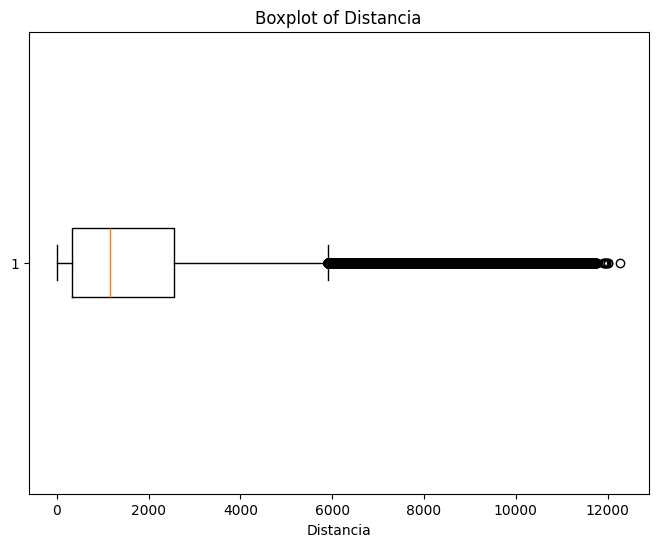

In [245]:
plt.figure(figsize=(8, 6))
plt.boxplot(hotel_clean['orig_destination_distance'], vert=False)  
plt.title('frequency of Distance')
plt.xlabel('Distance')
plt.show()

The majority of distances between hotels and customers during their searches are below 3000, with an average distance of approximately 1975.54. Furthermore, we observe that both the minimum and maximum distances exhibit significant variation. The maximum distance recorded is as high as 12280.48, while the minimum is a mere 0.01. Additionally, the median distance shows that 50% of customers search for hotels at a location of approximately 1168.39.

#### Making an analysis in column `user_id` <a class= 'anchor' id = '7'></a> 

In [250]:
hotel_clean['user_id'].nunique()

494167

In [253]:
customer_frequency = hotel_clean['user_id'].value_counts()

# Calculate the average frequency
average_frequency = customer_frequency.mean()

print(f'Average Frequency of Customer Interactions: {average_frequency:.2f}')

Average Frequency of Customer Interactions: 3.89


The mean interaction frequency per customer is approximately 3.89, this insight provides a valuable understanding of customer engagement.

#### Naking an analysis in column `is_mobile` <a class= 'anchor' id = '8'></a> 

In [257]:
hotel_clean['is_mobile'].value_counts() / len(hotel_clean) * 100

is_mobile
0   87.05
1   12.95
Name: count, dtype: float64

In this dataset, the vast majority of customers, accounting for 87.05%, accessed the website from non-mobile devices, while the remaining 12.95% accessed it from mobile devices.

#### Making an analysis in column `is_package` <a class= 'anchor' id = '9'></a> 

In [258]:
hotel_clean['is_package'].value_counts() / len(hotel_clean) * 100

is_package
0   75.39
1   24.61
Name: count, dtype: float64

Within this dataset, the majority of clicks/bookings, totaling 75.39%, were d. In contrast, 24.61% of the interactions involved such combined packages.

In [260]:
hotel_clean.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

#### Making an analysis in column `channel` <a class= 'anchor' id = '10'></a> 

In [265]:
hotel_clean['channel'].unique()

array([ 9,  0,  2,  1,  5,  3,  6,  7,  4,  8, 10])

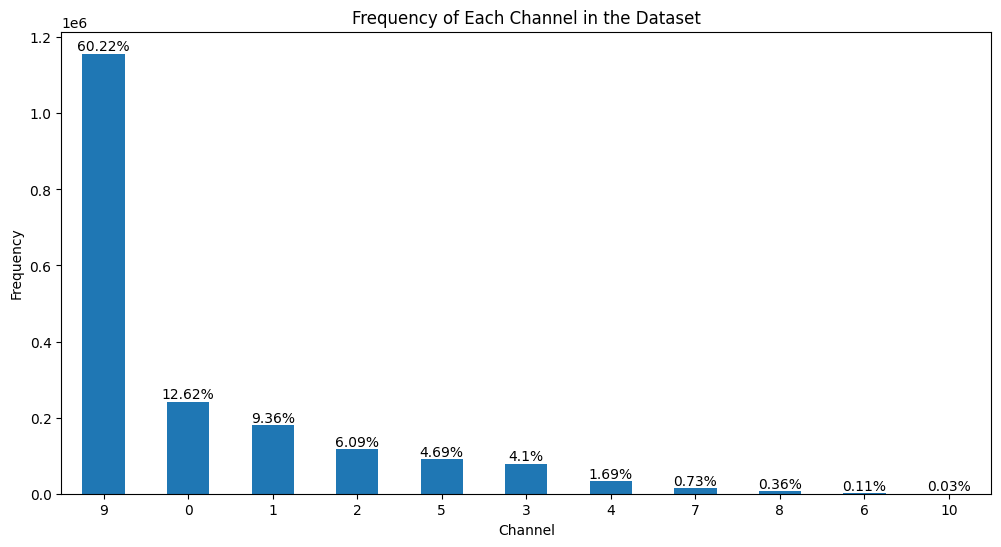

In [296]:
# Counting the channel
channel_counts = hotel_clean['channel'].value_counts()

# Sort the channel by frequency in descending order
channel_counts = channel_counts.sort_values(ascending=False)

# Calculate the percentages
percentages = (channel_counts / len(hotel_clean) * 100).round(2)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = channel_counts.plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Frequency')
plt.title('Frequency of Each Channel in the Dataset')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(channel_counts, percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()

We observe that among the 11 available ID channels, a significant majority, comprising 60.22%, is associated with Channel 9. Additionally, there are four channels, each contributing less than 1% to the dataset.

#### Making an analysis in columns `srch_ci`, `srch_co` and `number_of_days` <a class= 'anchor' id = '11'></a> 

In [300]:
hotel_clean.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [302]:
hotel_clean['srch_ci'].head(10)

3     2014-08-11
8     2014-12-25
11    2013-03-24
13    2013-10-09
14    2014-01-17
17    2014-06-19
19    2014-06-29
21    2014-04-17
22    2013-02-22
23    2013-07-06
Name: srch_ci, dtype: object

In [304]:
hotel_clean['srch_co'].head(10)

3     2014-08-13
8     2014-12-28
11    2013-03-25
13    2013-10-11
14    2014-01-18
17    2014-06-23
19    2014-07-01
21    2014-04-18
22    2013-02-26
23    2013-07-13
Name: srch_co, dtype: object

In [308]:
hotel_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1920731 entries, 3 to 4670290
Data columns (total 24 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   date_time                  datetime64[ns]
 1   site_name                  int64         
 2   posa_continent             int64         
 3   user_location_country      int64         
 4   user_location_region       int64         
 5   user_location_city         int64         
 6   orig_destination_distance  float64       
 7   user_id                    int64         
 8   is_mobile                  int64         
 9   is_package                 int64         
 10  channel                    int64         
 11  srch_ci                    object        
 12  srch_co                    object        
 13  srch_adults_cnt            int64         
 14  srch_children_cnt          int64         
 15  srch_rm_cnt                int64         
 16  srch_destination_id        int64         

In [309]:
# Convert date columns to datetime objects
hotel_clean['srch_ci'] = pd.to_datetime(hotel_clean['srch_ci'])
hotel_clean['srch_co'] = pd.to_datetime(hotel_clean['srch_co'])

In [310]:
hotel_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1920731 entries, 3 to 4670290
Data columns (total 24 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   date_time                  datetime64[ns]
 1   site_name                  int64         
 2   posa_continent             int64         
 3   user_location_country      int64         
 4   user_location_region       int64         
 5   user_location_city         int64         
 6   orig_destination_distance  float64       
 7   user_id                    int64         
 8   is_mobile                  int64         
 9   is_package                 int64         
 10  channel                    int64         
 11  srch_ci                    datetime64[ns]
 12  srch_co                    datetime64[ns]
 13  srch_adults_cnt            int64         
 14  srch_children_cnt          int64         
 15  srch_rm_cnt                int64         
 16  srch_destination_id        int64         

In [312]:
hotel_clean['number_of_days'] = (hotel_clean['srch_co'] - hotel_clean['srch_ci']).dt.days
hotel_clean['number_of_days'] 

3           2
8           3
11          1
13          2
14          1
           ..
4670284     1
4670285     1
4670287     4
4670288     2
4670290    11
Name: number_of_days, Length: 1920731, dtype: int64

In [315]:
hotel_clean['number_of_days'].nunique()

119

In [314]:
hotel_clean['number_of_days'].value_counts() / len(hotel_clean) * 100

number_of_days
1     27.80
2     20.53
3     16.95
4     11.98
5      6.86
       ... 
365    0.00
118    0.00
155    0.00
367    0.00
147    0.00
Name: count, Length: 119, dtype: float64

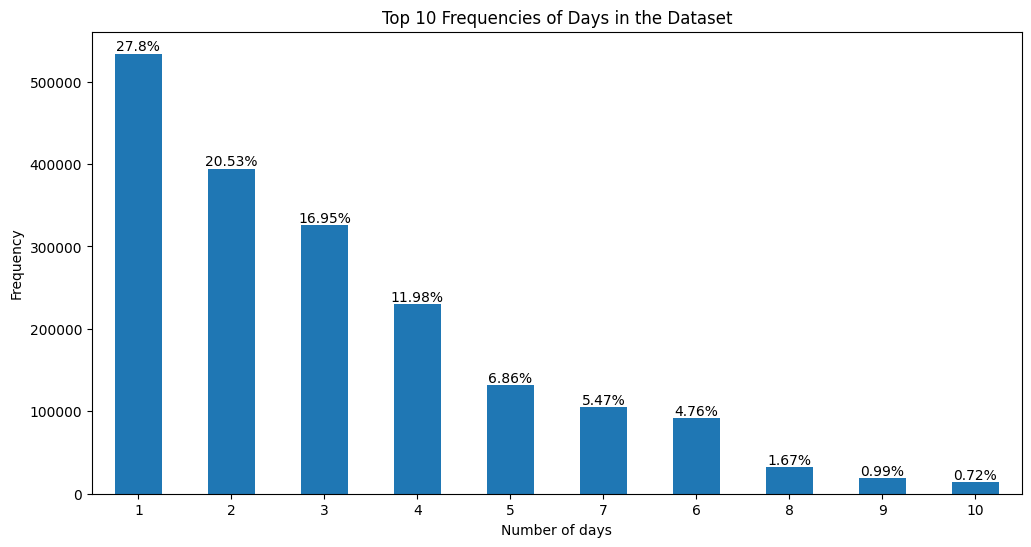

In [378]:
# Counting the days
channel_counts = hotel_clean['number_of_days'].value_counts()

# Sort the days by frequency in descending order
channel_counts = channel_counts.sort_values(ascending=False)

# Calculate the percentages
percentages = (channel_counts / len(hotel_clean) * 100).round(2)

# Select the top 10 records
top_10_channel_counts = channel_counts.head(10)
top_10_percentages = percentages.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = top_10_channel_counts.plot(kind='bar')
plt.xlabel('Number of days')
plt.ylabel('Frequency')
plt.title('Top 10 Frequencies of Days in the Dataset')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(top_10_channel_counts, top_10_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()

This graphic highlights the top 10 search durations for hotel stays. Notably, around 27.8% of users opt for single-day hotel stays. In contrast, individuals planning extended stays of over ten days make up a minority, amounting to less than 1% of the searches.

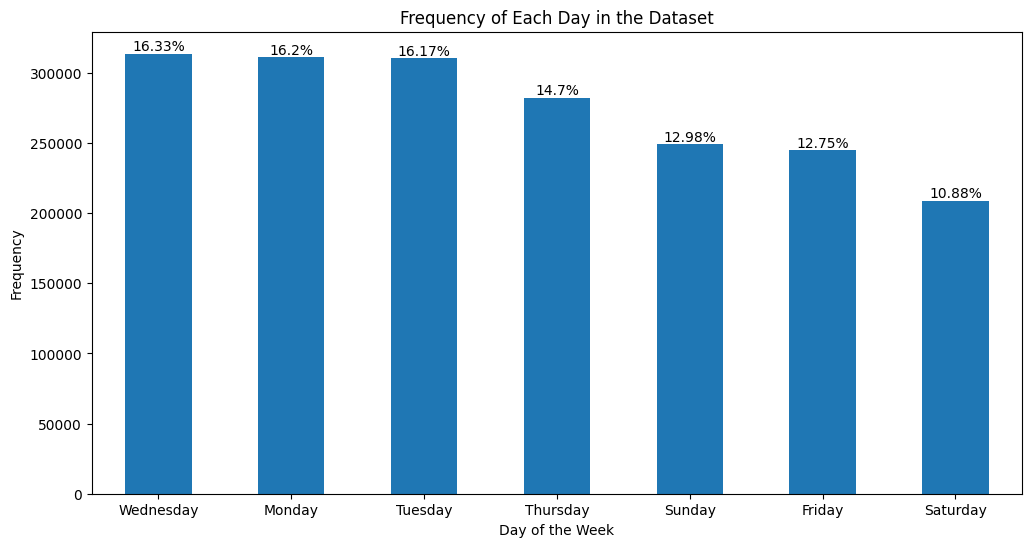

In [321]:
hotel_day = hotel_clean['date_time'].dt.day_name()

# Then, count the occurrences of each day
day_counts = hotel_day.value_counts()

# Sort the days by frequency in descending order
day_counts = day_counts.sort_values(ascending=False)

# Calculate the percentages
day_percentages = (day_counts / len(hotel_clean) * 100).round(2)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = day_counts.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Frequency of Each Day in the Dataset')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(day_counts, day_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()


Wednesday, closely followed by Monday and Tuesday, is the day of the week when users are most active in terms of clicking and making bookings on the website. Conversely, activity is at its lowest on weekends, indicating reduced user engagement during that time.

In [324]:
hotel_clean['srch_co'].head(10)

3    2014-08-13
8    2014-12-28
11   2013-03-25
13   2013-10-11
14   2014-01-18
17   2014-06-23
19   2014-07-01
21   2014-04-18
22   2013-02-26
23   2013-07-13
Name: srch_co, dtype: datetime64[ns]

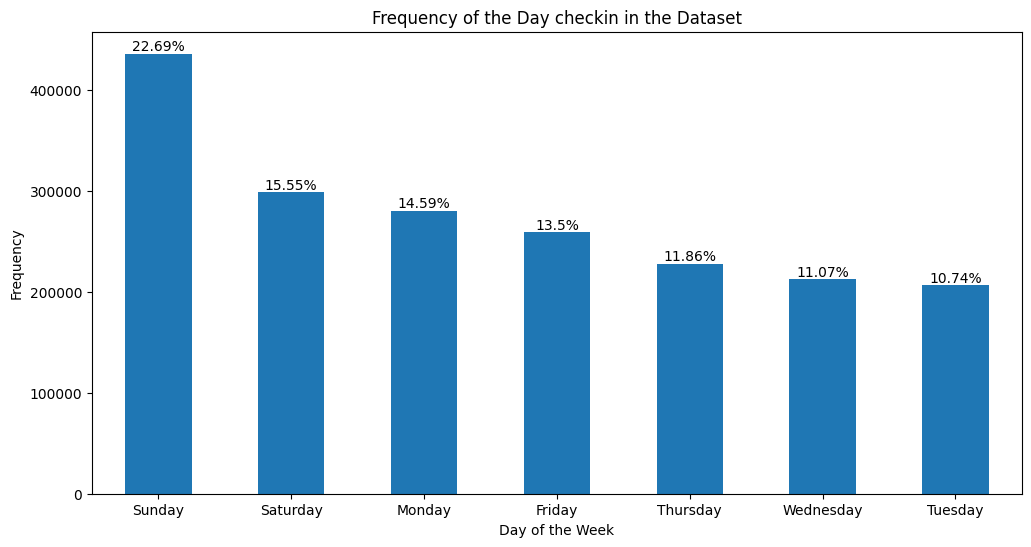

In [329]:
checkin_day = hotel_clean['srch_co'].dt.day_name()

# Then, count the occurrences of each day
checkin_counts = checkin_day.value_counts()

# Sort the days by frequency in descending order
checkin_counts = checkin_counts.sort_values(ascending=False)

# Calculate the percentages
checkin_percentages = (checkin_counts / len(hotel_clean) * 100).round(2)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = checkin_counts.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Frequency of the Day check in in the Dataset')
plt.xticks(rotation=0)


# Adding labels to the top of the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(checkin_counts, checkin_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')


# Show the plot
plt.show()

Sunday is the most popular day of the week for customers to make clicks/bookings for their check-in days.

#### Making an analysis in columns `srch_adults_cnt`, `srch_children_cnt` and `srch_rm_cnt` <a class= 'anchor' id = '12'></a> 

In [332]:
hotel_clean['srch_adults_cnt']

3          2
8          2
11         2
13         2
14         2
          ..
4670284    1
4670285    2
4670287    2
4670288    2
4670290    1
Name: srch_adults_cnt, Length: 1920731, dtype: int64

In [358]:
sorted(hotel_clean['srch_adults_cnt'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [348]:
(hotel_clean['srch_adults_cnt'] == 0).sum()


3947

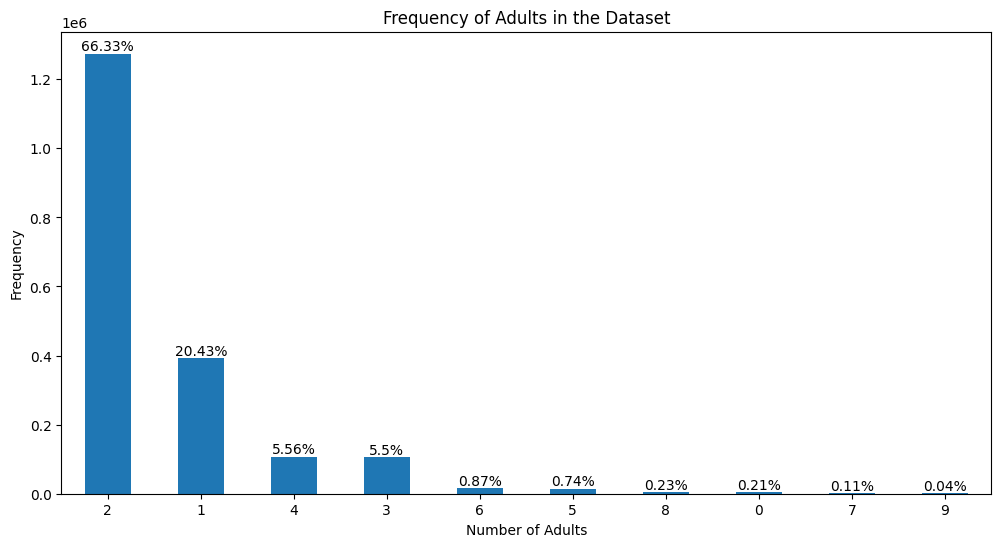

In [362]:
# Then, count the occurrences of each day
adults_counts = (hotel_clean['srch_adults_cnt'].value_counts()).sort_values(ascending=False)

# Calculate the percentages
adults_percentages = (adults_counts / len(hotel_clean) * 100).round(2)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = adults_counts.plot(kind='bar')
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.title('Frequency of Adults in the Dataset')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(adults_counts, adults_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()

The majority of clicks and bookings are made for 2 adults. However, bookings for 5 or more adults are relatively rare. This suggests that the most common scenario involves couples booking hotels. Now, let's shift our focus to the presence of children.

In [360]:
sorted(hotel_clean['srch_children_cnt'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

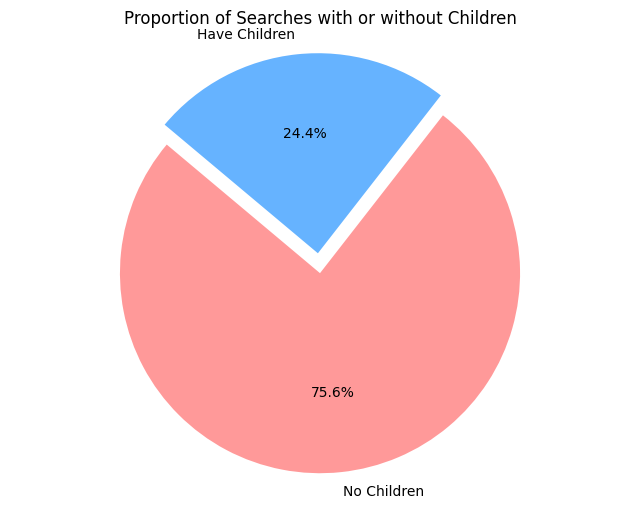

In [500]:
# Count occurrences of 0 in the column
count_of_zeros = (hotel_clean['srch_children_cnt'] == 0).sum()

# Count occurrences of non-zero values in the column
count_of_non_zeros = (hotel_clean['srch_children_cnt'] != 0).sum()

# Data for the pie chart
labels = ['No Children', 'Have Children']
sizes = [count_of_zeros, count_of_non_zeros]
colors = ['#ff9999', '#66b3ff']  # Custom colors

# Explode the 'Have Children' slice
explode = (0, 0.1)

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.title('Proportion of Searches with or without Children')
plt.show()

In the following graphic, we observe that a significant portion of searches on the website doesn't include children.

In [368]:
hotel_clean['srch_rm_cnt'].unique()

array([1, 2, 4, 5, 3, 7, 8, 6, 0])

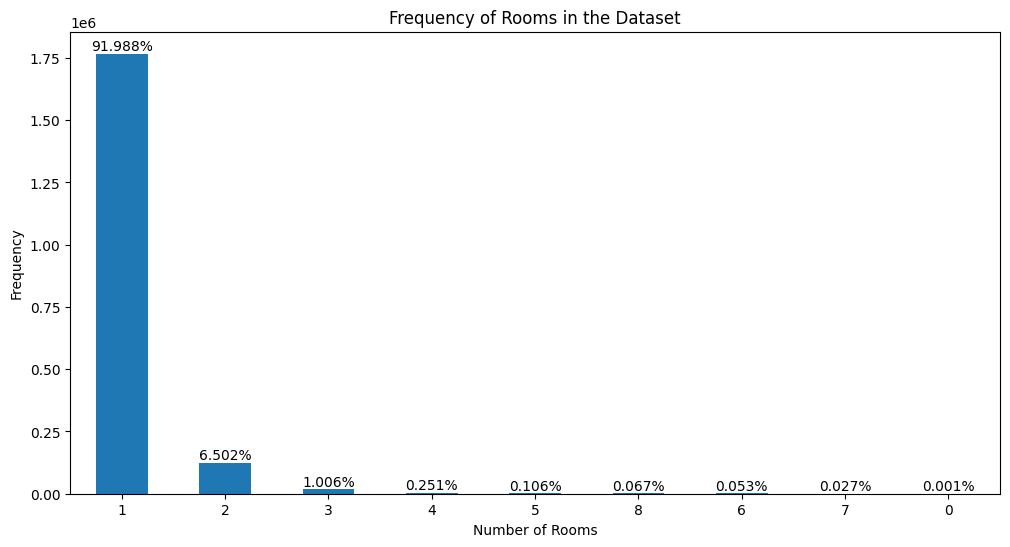

In [425]:
# Then, count the occurrences of each day
room_counts = (hotel_clean['srch_rm_cnt'].value_counts()).sort_values(ascending=False)

# Calculate the percentages
room_percentages = (room_counts / len(hotel_clean) * 100).round(3)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = room_counts.plot(kind='bar')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.title('Frequency of Rooms in the Dataset')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(room_counts, room_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()

Given that a substantial portion of clicks/bookings is for couples (two adults), it's logical to observe that most searches correspond to a single room. The prevalence of single-room bookings begins to diminish as the number of rooms requested increases.

#### Making an analysis in columns `srch_destination_id` and `srch_destination_type_id` <a class= 'anchor' id = '13'></a> 

In [372]:
hotel_clean['srch_destination_id'].nunique()

26025

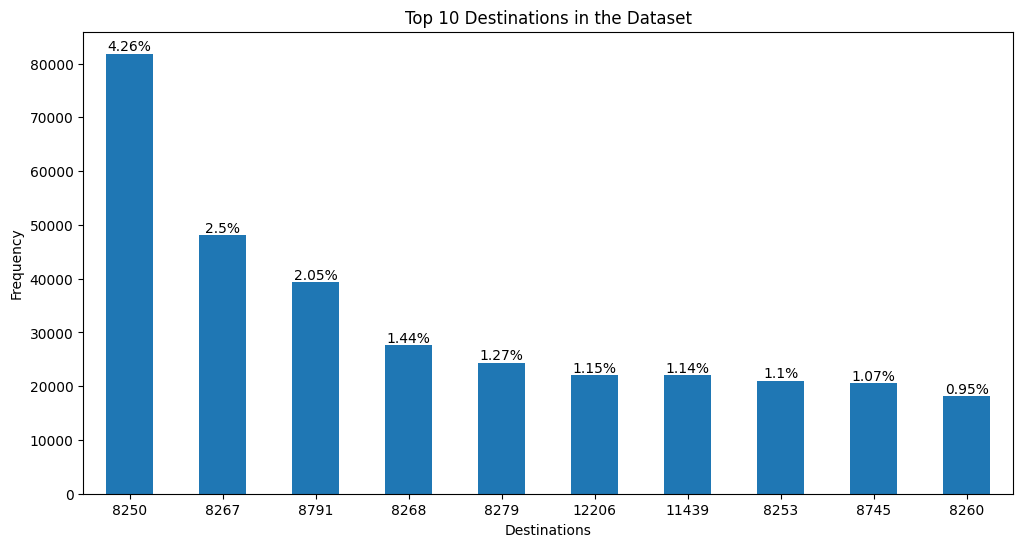

In [395]:
# Counting the days
destination_counts = (hotel_clean['srch_destination_id'].value_counts()).sort_values(ascending = False)

# Calculate the percentages
destination_percentages = (destination_counts / len(hotel_clean) * 100).round(2)

# Select the top 10 records
top_10_destination_counts = destination_counts.head(10)
top_10_percentages = destination_percentages.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = top_10_destination_counts.plot(kind='bar')
plt.xlabel('Destinations')
plt.ylabel('Frequency')
plt.title('Top 10 Destinations in the Dataset')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(top_10_destination_counts, top_10_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()


In this datset we have 26025 destinations the grafic is show the top 10 more searched in the website.

In [399]:
hotel_clean['srch_destination_type_id'].unique()

array([1, 6, 3, 5, 4, 8, 7, 9])

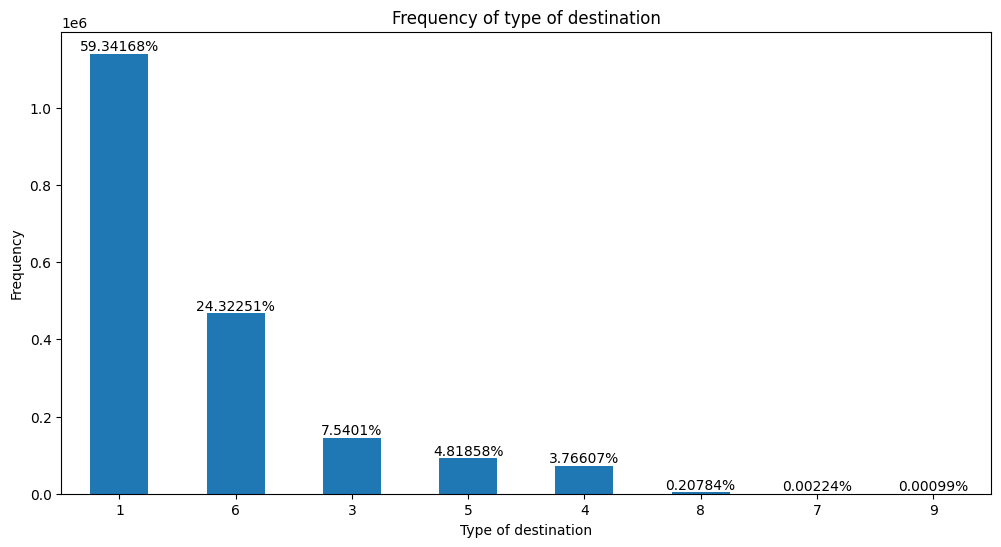

In [423]:
# Then, count the occurrences of each day
destination_type_counts = (hotel_clean['srch_destination_type_id'].value_counts()).sort_values(ascending=False)

# Calculate the percentages
destination_type_percentages = (destination_type_counts / len(hotel_clean) * 100).round(5)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = destination_type_counts.plot(kind='bar')
plt.xlabel('Type of destination')
plt.ylabel('Frequency')
plt.title('Frequency of type of destination')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(destination_type_counts, destination_type_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()

This graphic illustrates that the majority of destinations fall under type 1, while types 7 and 9 represent only a small fraction of the total destinations.

#### Making an analysis in column `is_booking` <a class= 'anchor' id = '14'></a> 

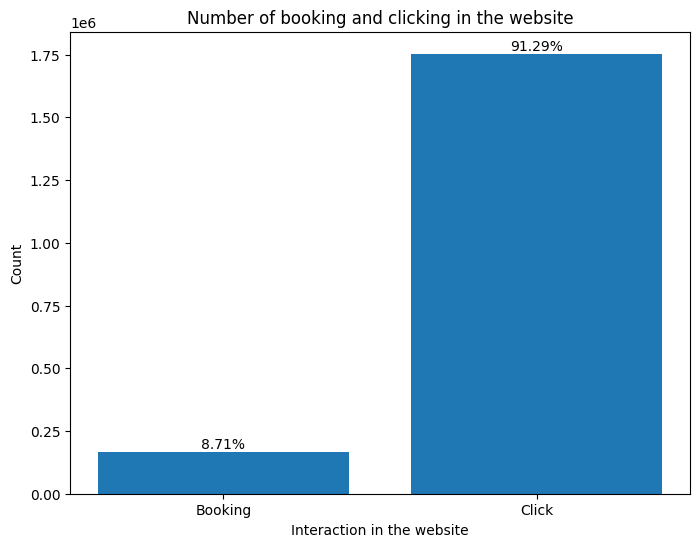

In [428]:
# Count occurrences of 0 in the column
count_click = (hotel_clean['is_booking'] == 0).sum()

# Count occurrences of 1 in the column
count_booking = (hotel_clean['is_booking'] == 1).sum()

# Calculate the percentages
total = count_click + count_booking
percentage_click = (count_click / total) * 100
percentage_booking = (count_booking / total) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Booking', 'Click'], [count_booking, count_click])
plt.xlabel('Interaction in the website')
plt.ylabel('Count')
plt.title('Number of booking and clicking in the website')

# Show the percentages on top of the bars
plt.text(0, count_booking, f'{percentage_booking:.2f}%', ha='center', va='bottom')
plt.text(1, count_click, f'{percentage_click:.2f}%', ha='center', va='bottom')

plt.show()

Observing the data, it's evident that a substantial majority, amounting to 91.29%, of interactions on the website are merely clicks, whereas a more modest 8.71% represent actual bookings.

#### Making an analysis in column `cnt` <a class= 'anchor' id = '15'></a> 

In [446]:
hotel_clean['cnt'].unique()

array([ 1,  4,  3,  2,  6,  8,  5,  7, 17, 13, 10, 15, 12, 20, 14,  9, 21,
       19, 16, 11, 22, 33, 24, 18, 26, 40, 28, 25, 31, 23, 27, 44, 29, 46,
       36, 48, 39, 45, 35, 37, 30, 42, 86, 32, 52, 47, 38, 58, 41, 76, 62,
       51, 34, 53, 82])

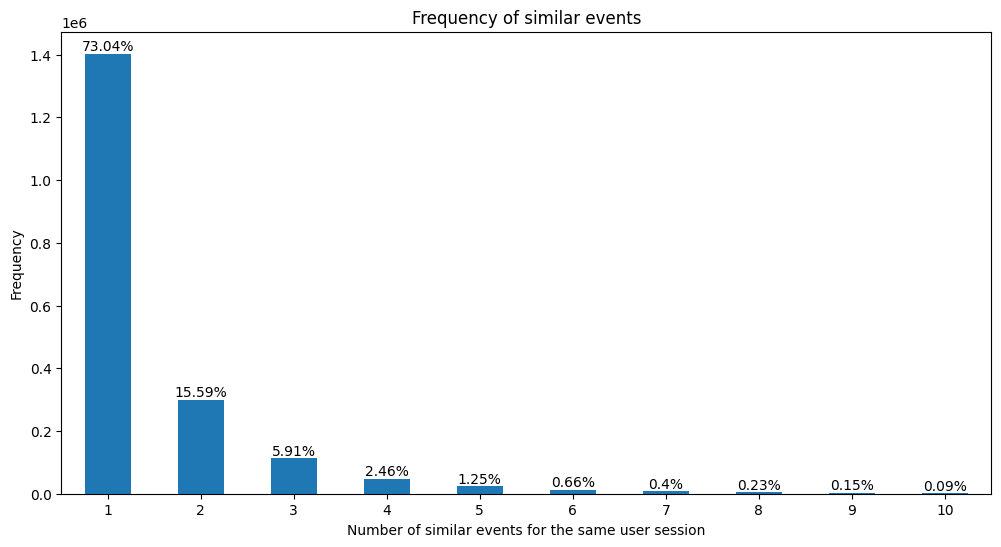

In [453]:
# Then, count the occurrences of each 
cnt_counts = (hotel_clean['cnt'].value_counts()).sort_values(ascending=False)

# Calculate the percentages
cnt_percentages = (cnt_counts / len(hotel_clean) * 100).round(2)

# Select the top 10 records
top_10_cnt_counts = cnt_counts.head(10)
top_10_percentages = cnt_percentages.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = top_10_cnt_counts.plot(kind='bar')
plt.xlabel('Number of similar events for the same user session')
plt.ylabel('Frequency')
plt.title('Frequency of similar events')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(top_10_cnt_counts, top_10_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()

The graph displays the top 10 similar events within the context of the same user session. It's evident that the percentage decreases as the number of similar interactions increases. Specifically, only 15.59% of events occur twice, while those occurring more than six times represent less than 1% of the total.

#### Making an analysis in columns `hotel_continent`, `hotel_country` and `hotel_market` <a class= 'anchor' id = '16'></a> 

In [454]:
hotel_clean['hotel_continent'].unique()

array([6, 2, 0, 4, 3, 5, 1])

In [455]:
hotel_clean['hotel_country'].unique()

array([208,  50,  77,  63, 144,   8, 204,  67, 198,   4, 170,  99, 196,
        51, 146,  47,  70, 107, 182, 105,  12,  96, 152, 163,   5, 171,
        22, 203, 106,   0,  17, 174,  32,  21, 121,  68,  38, 128, 169,
       130, 156,  31,  34, 125,  53,  46,  48,  73, 104, 136,   7, 140,
       122,  79, 119,  45, 186,  72, 126,  71,  11, 151, 159, 180, 135,
       194, 157, 147, 124,  82, 118, 168,  87,  15, 111, 108,  13,  93,
        80, 100,  26, 212, 141, 112, 193, 199, 110,  92, 206, 162,  52,
       127, 185,  36,  35,  58,  44, 158, 137,  98,  25, 202,   1, 131,
        20,  89,  27, 161,  83,  14,   9, 115,  81,  84, 134, 183, 200,
        64, 132, 188,  78,  57,  61, 148,  75,  33, 160, 153, 189, 179,
        10, 192, 165,  29,  76,  40,  28, 178,   2,  66,  19,  30, 102,
       201, 139,  88, 114,  24,  39, 177, 143, 142, 103, 191,  23, 166,
       181,  60, 116,   3, 211,   6,  42,  18, 133, 129, 195, 109, 197,
       120,  16, 101, 173, 184, 190,  97,  74, 167,  55,  54,  6

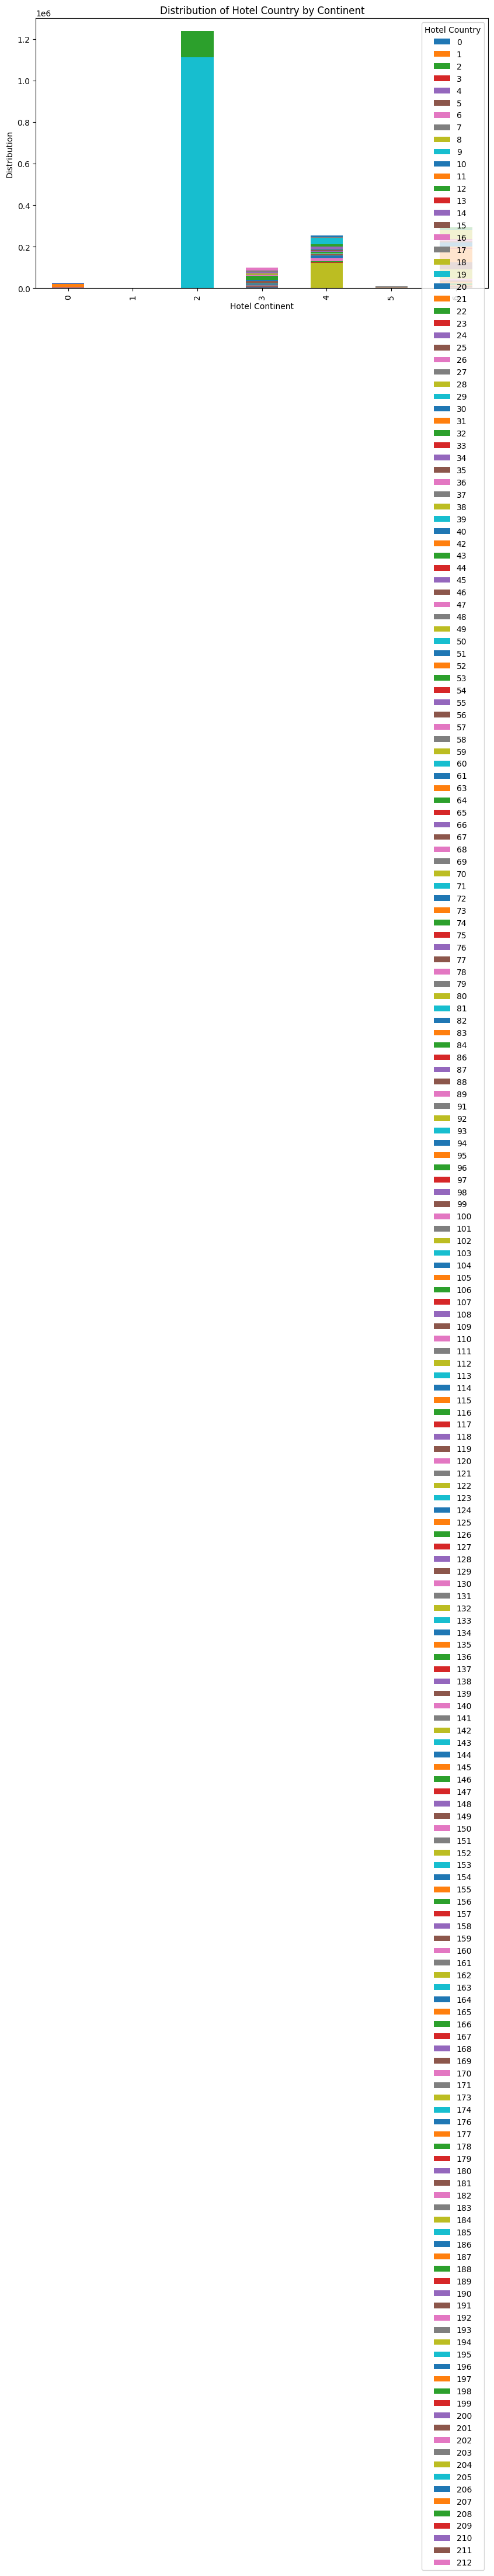

In [458]:
# Group the data by 'hotel_continent' and 'hotel_country' and count the occurrences
grouped_data = hotel_clean.groupby(['hotel_continent', 'hotel_country']).size().unstack(fill_value=0)

# Create a stacked bar plot
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot with labels and titles
plt.xlabel('Hotel Continent')
plt.ylabel('Distribution')
plt.title('Distribution of Hotel Country by Continent')

# Show the plot
plt.legend(title='Hotel Country', loc='upper right')
plt.show()

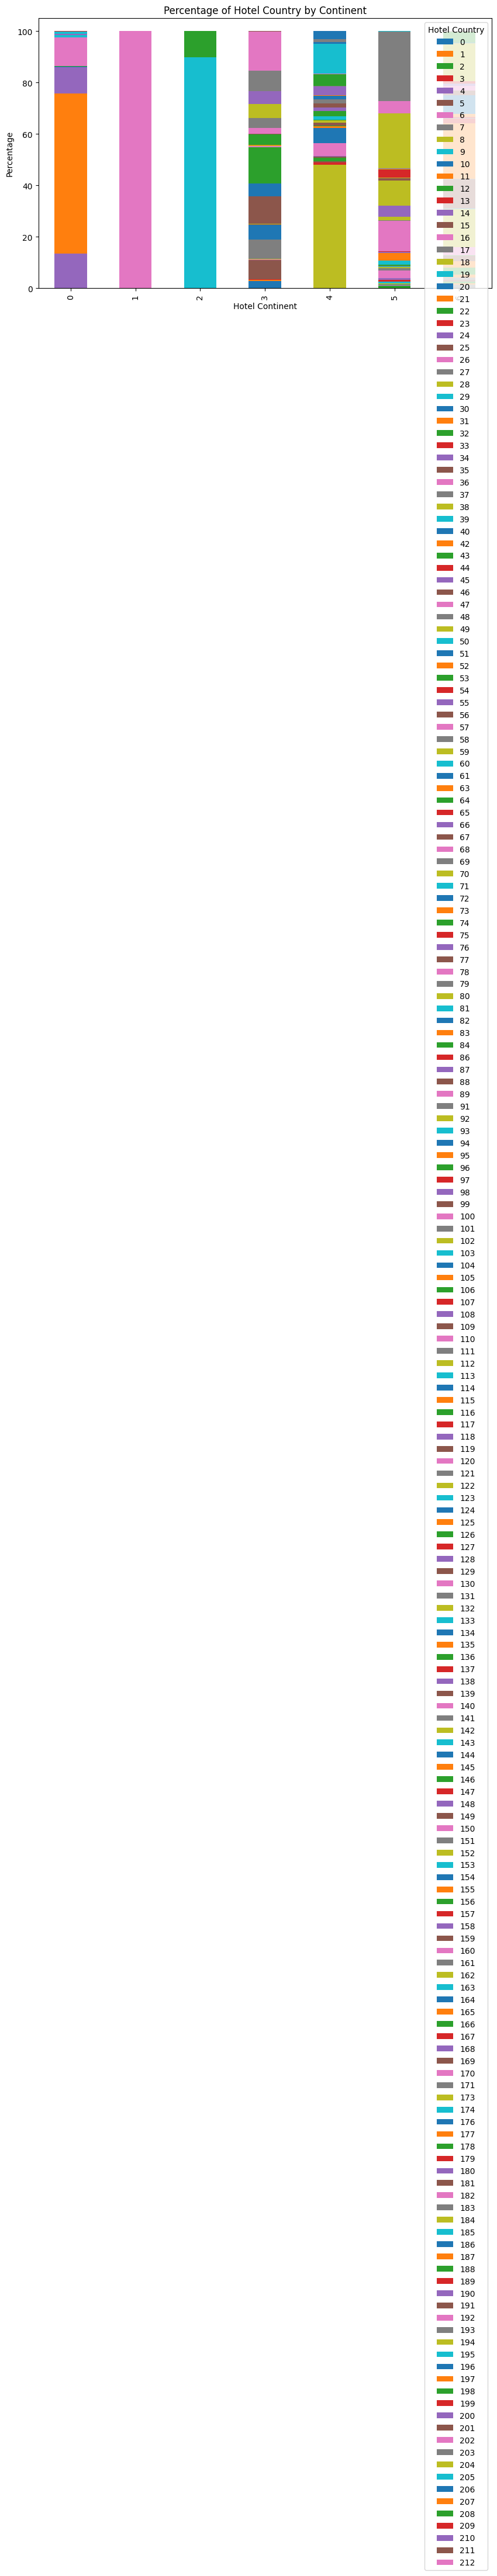

In [457]:
# Group the data by 'hotel_continent' and 'hotel_country' and count the occurrences
grouped_data = hotel_clean.groupby(['hotel_continent', 'hotel_country']).size().unstack(fill_value=0)

# Calculate the total count for each 'posa_continent'
total_counts = grouped_data.sum(axis=1)

# Calculate the percentage for each 'site_name'
percentage_data = grouped_data.divide(total_counts, axis=0) * 100

# Create a stacked bar plot with percentages
percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot with labels and titles
plt.xlabel('Hotel Continent')
plt.ylabel('Percentage')
plt.title('Percentage of Hotel Country by Continent')

# Show the plot
plt.legend(title='Hotel Country', loc='upper right')
plt.show()

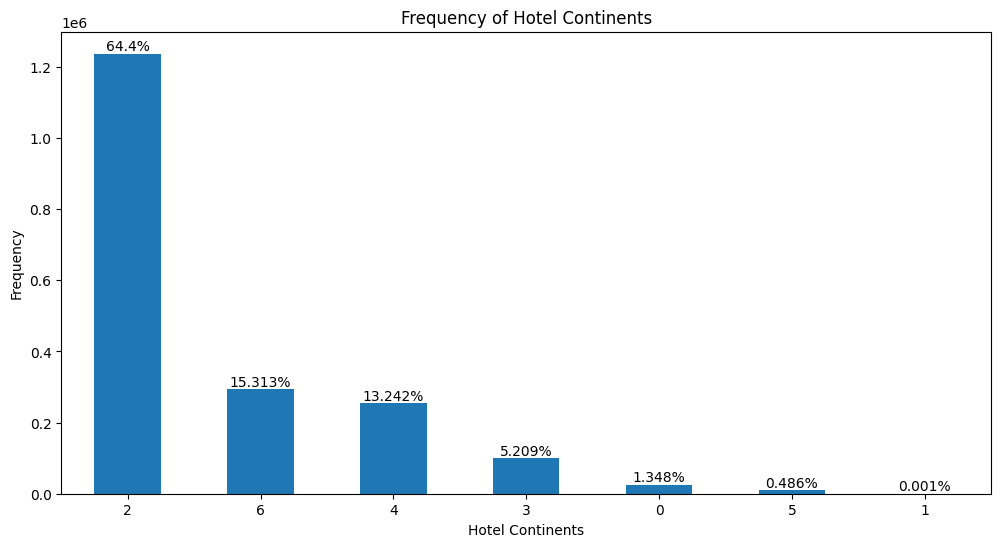

In [468]:
# Then, count the occurrences of each 
continents_counts = (hotel_clean['hotel_continent'].value_counts()).sort_values(ascending=False)

# Calculate the percentages
continents_percentages = (continents_counts / len(hotel_clean) * 100).round(3)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = continents_counts.plot(kind='bar')
plt.xlabel('Hotel Continents')
plt.ylabel('Frequency')
plt.title('Frequency of Hotel Continents')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(continents_counts, continents_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()

In [469]:
filtered_data = hotel_clean[hotel_clean['hotel_continent'] == 2]

# Print the filtered data
print(filtered_data['hotel_country'].unique())

[ 50 198]


In [512]:
filtered_data = hotel_clean[hotel_clean['hotel_continent'] == 6]

# Print the filtered data
print(filtered_data['hotel_country'].unique())

[208  77 144 204   4 170  70 107 105  12  22  17  21  68 169  31  46   7
  79  72  71  11 159 180 135  15 111 212 199 206 127  58  44  20  83  14
   9 134 200  64  78  75  33  66  30 143 191 166 211  74  69 138  59]


The analysis reveals that the majority of website interactions are focused on continent 2, while continents 0, 5, and 1 experience considerably fewer interactions. Furthermore, within continent 2, customers concentrate on two specific countries, namely 50 and 198. With the exception of continents 1 and 2, the remaining continents exhibit a greater diversity of countries.

In [478]:
hotel_clean['hotel_market'].nunique()

2090

#### making an analysis in column `hotel_cluster` <a class= 'anchor' id = '17'></a> 

In [480]:
hotel_clean['hotel_cluster'].nunique()

100

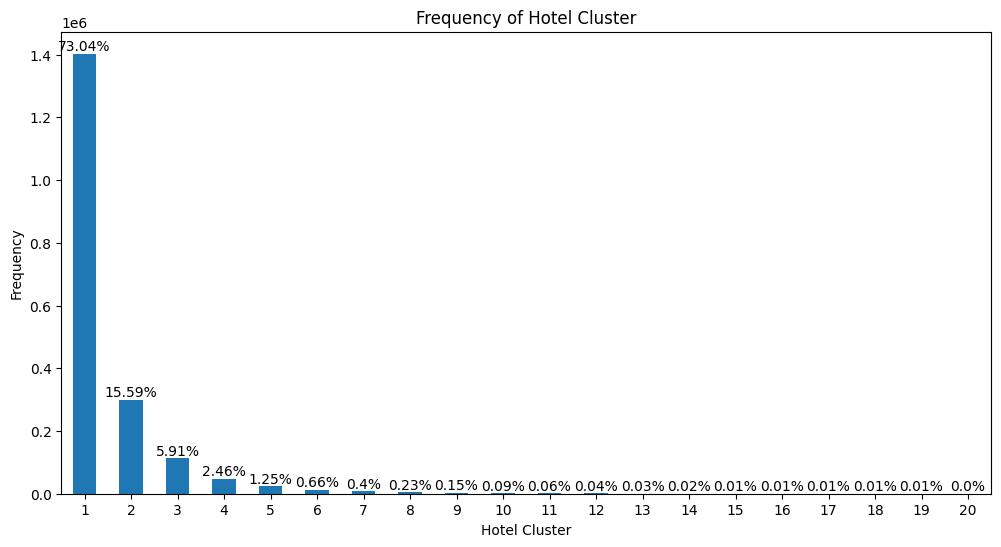

In [489]:
# Then, count the occurrences of each 
hotel_cluster_counts = (hotel_clean['hotel_cluster'].value_counts()).sort_values(ascending=False)

# Calculate the percentages
hotel_cluster_percentages = (hotel_cluster_counts / len(hotel_clean) * 100).round(2)

# Select the top 20 records
top_20_counts = cnt_counts.head(20)
top_20_percentages = cnt_percentages.head(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = top_20_counts.plot(kind='bar')
plt.xlabel('Hotel Cluster')
plt.ylabel('Frequency')
plt.title('Frequency of Hotel Cluster')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(top_20_counts, top_20_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()

The `hotel_cluster` column serves as the target variable, which is crucial for predicting the hotel cluster associated with a user event. This prediction is based on various attributes linked to the user event and aims to identify one of the 100 potential hotel clusters. A glance at the graphic reveals that the majority of searches are concentrated in Hotel Clusters 1 and 2, with anything beyond 5 representing less than 1% each.

#### Some graphics <a class= 'anchor' id = '18'></a> 

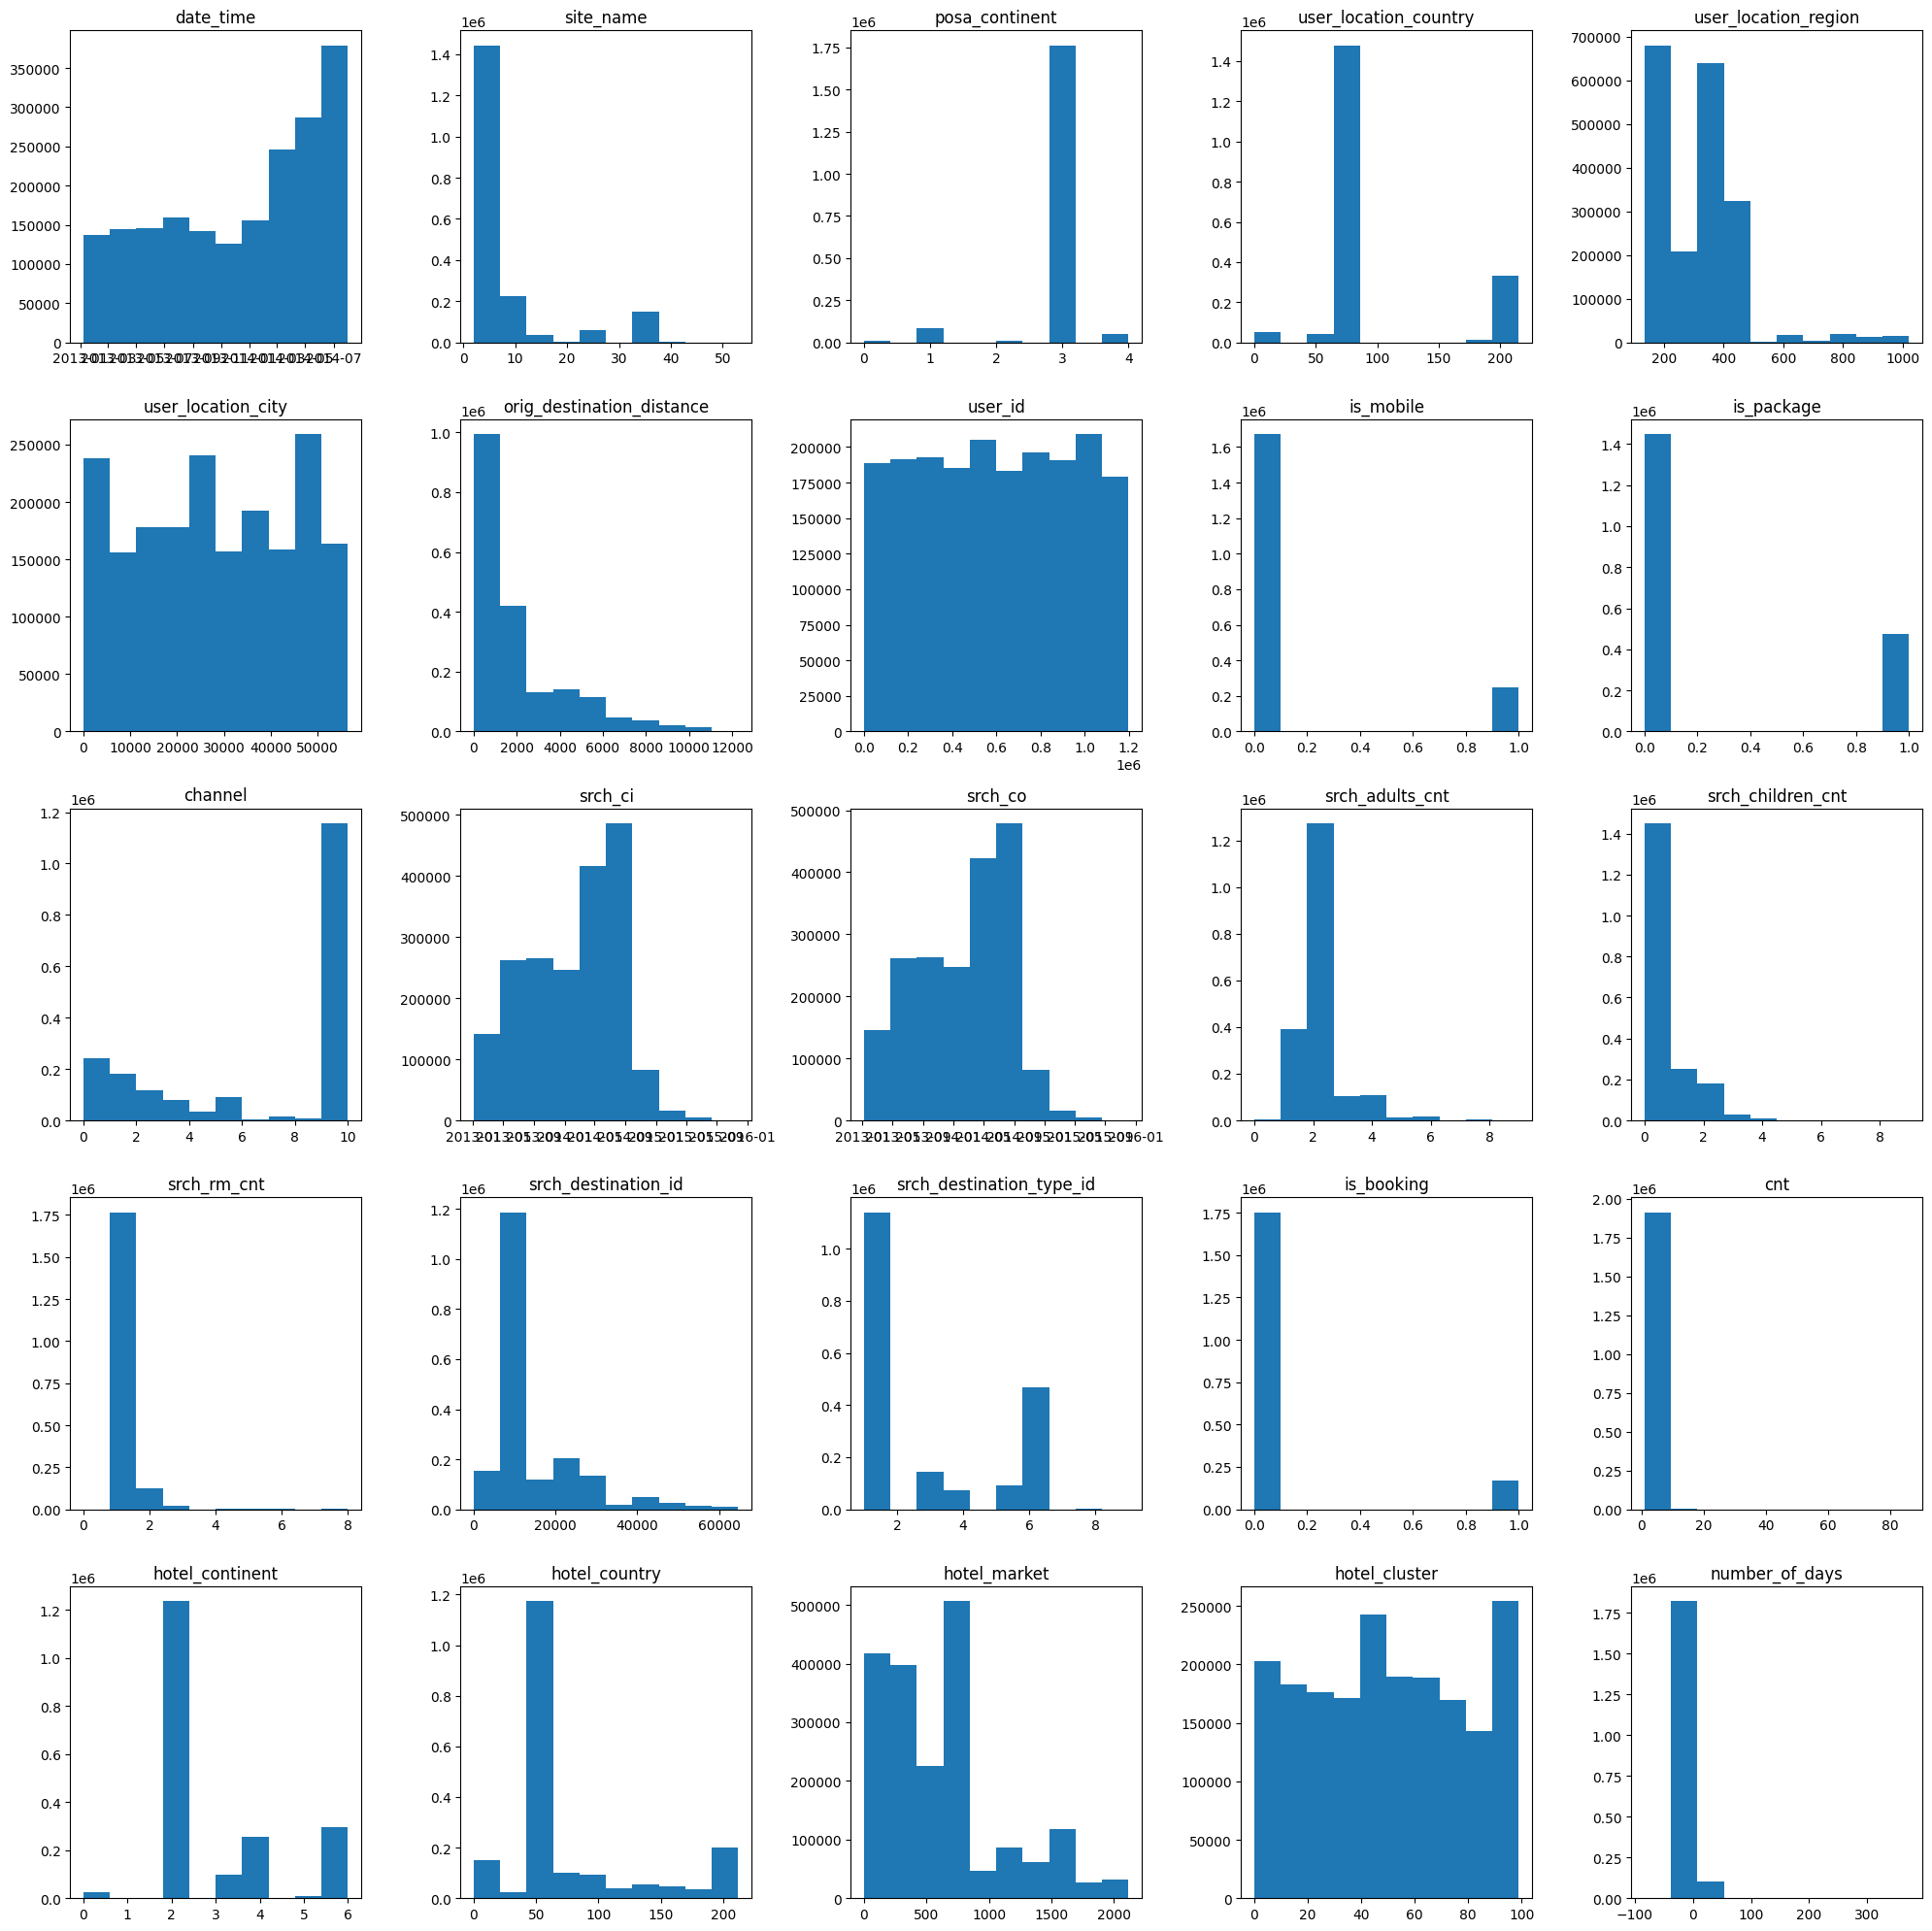

In [441]:
plt.subplots(5, 5, figsize=(20, 20))

count = 1

for col in hotel_clean.columns:
    plt.subplot(5, 5, count)
    plt.hist(hotel_clean[col])
    plt.title(col)
    
    count += 1
    
plt.tight_layout()
plt.show()

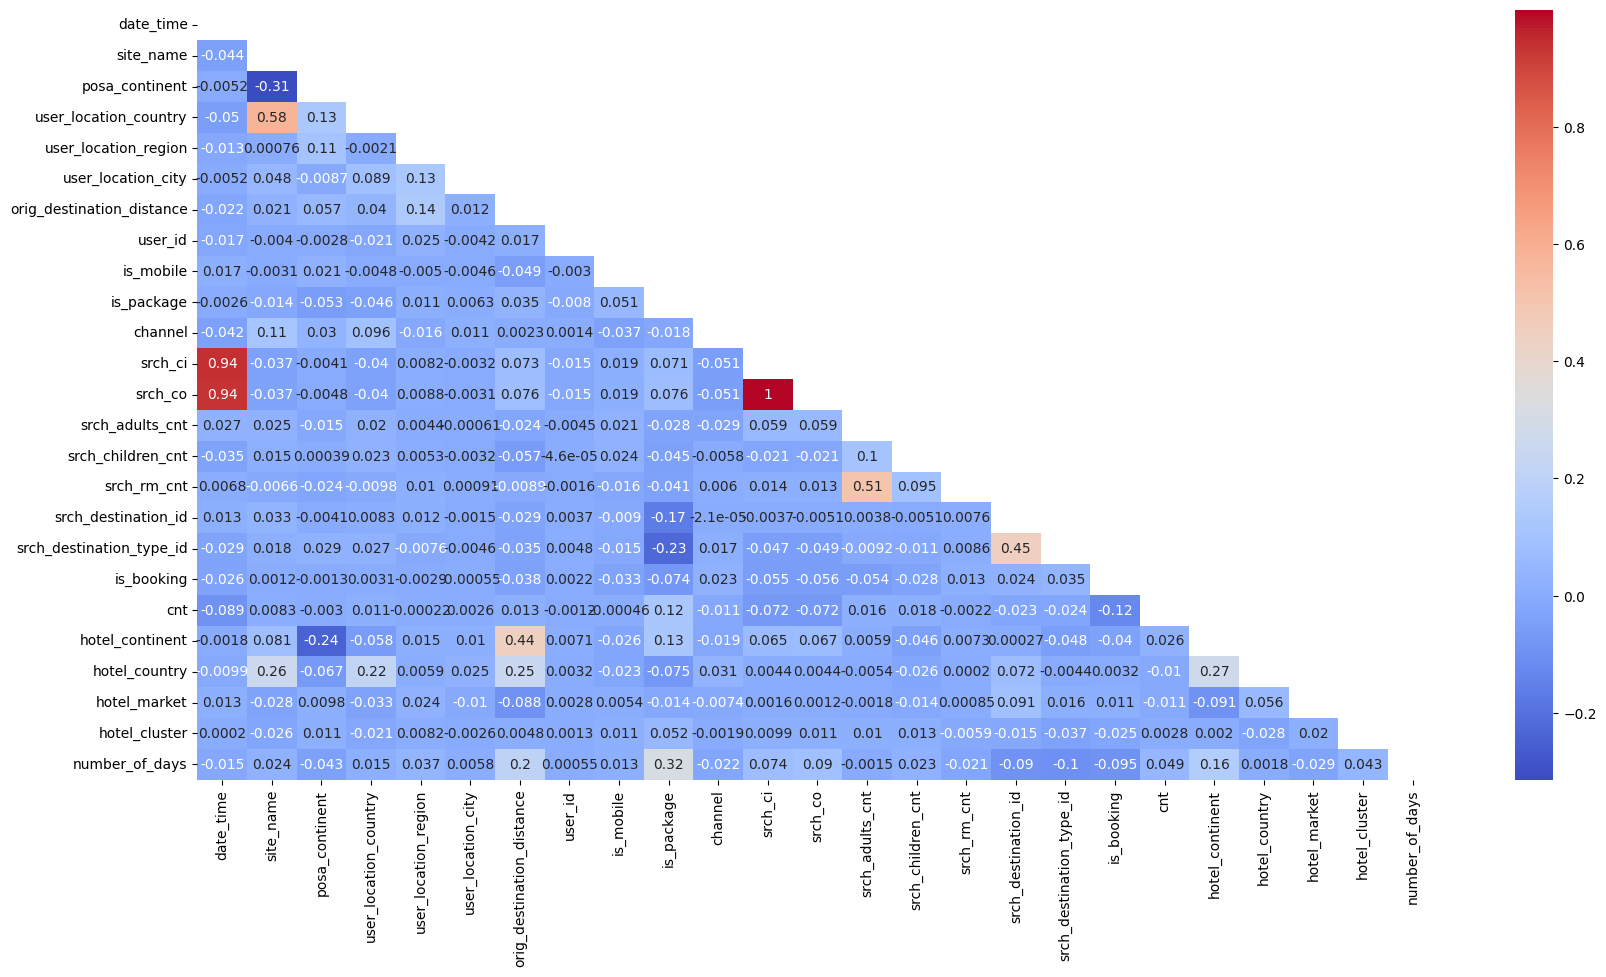

In [490]:
# find the correlation between the variables
corr = hotel_clean.corr()

# plot the correlation matrix using a heatmap
plt.figure(figsize=(20,10))
matrix = np.triu(hotel_clean.corr())
sns.heatmap(corr, annot=True, mask=matrix, cmap='coolwarm')
plt.show()

The heatmap presents a clear depiction of the dataset's correlations. Notably, there exists a strong positive correlation between the variables `srch_ci` and `srch_co` indicating that as one date shifts, the other follows suit. Furthermore, both `srch_ci` and `srch_co` exhibit a high correlation with `date_time`, which signifies the temporal aspect of the customers' interactions.

Another notable positive correlation emerges between `srch_rm_cnt` and `srch_adults_cnt`, suggesting that the number of adults in a party has a direct influence on the required room count, which is a logical relationship.

It's worth mentioning that the majority of the heatmap displays negative correlations. This phenomenon likely results from the categorical nature of the variables represented as numbers. These numerical values, which should ideally be treated as labels or categories, inadvertently introduce negative correlations when analyzed in a numerical context.